## Preprocessing + EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import tree
import graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from hyperopt import hp, tpe, fmin

Посмотрим на данные 

In [ ]:
x_train_data = pd.read_csv('/content/drive/MyDrive/cmff/X_train.csv')
x_train_data.head(5)

,credit_card_utilization,age,overdue_30_59_days,debt_to_income,monthly_income,credits_loans,overdue__more_than_90_days,mortgage_loans,overdue_60_89_days,family_members
0,0.000000,56,0,0.504328,6823.894458,9,0,1,0,5.0
1,0.170659,45,1,2.405860,356.580765,5,0,0,0,0.0
2,0.342176,75,1,0.445066,20349.895825,9,0,3,0,0.0
3,0.046219,50,0,0.814508,2894.368968,12,0,1,0,3.0
4,0.679556,58,0,0.390311,24833.227614,15,0,4,0,2.0


In [ ]:
y_train_data = pd.read_csv('/content/drive/MyDrive/cmff/y_train.csv')
y_train_data.head(5)

,target
0,0
1,0
2,0
3,0
4,0


In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/cmff/X_test.csv')

In [ ]:
train_data = x_train_data
train_data['target'] = y_train_data
train_data.head(5)

,credit_card_utilization,age,overdue_30_59_days,debt_to_income,monthly_income,credits_loans,overdue__more_than_90_days,mortgage_loans,overdue_60_89_days,family_members,target
0,0.000000,56,0,0.504328,6823.894458,9,0,1,0,5.0,0
1,0.170659,45,1,2.405860,356.580765,5,0,0,0,0.0,0
2,0.342176,75,1,0.445066,20349.895825,9,0,3,0,0.0,0
3,0.046219,50,0,0.814508,2894.368968,12,0,1,0,3.0,0
4,0.679556,58,0,0.390311,24833.227614,15,0,4,0,2.0,0


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105109 entries, 0 to 105108
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   credit_card_utilization     105109 non-null  float64
 1   age                         105109 non-null  int64  
 2   overdue_30_59_days          105109 non-null  int64  
 3   debt_to_income              105109 non-null  float64
 4   monthly_income              84116 non-null   float64
 5   credits_loans               105109 non-null  int64  
 6   overdue__more_than_90_days  105109 non-null  int64  
 7   mortgage_loans              105109 non-null  int64  
 8   overdue_60_89_days          105109 non-null  int64  
 9   family_members              102304 non-null  float64
 10  target                      105109 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 8.8 MB


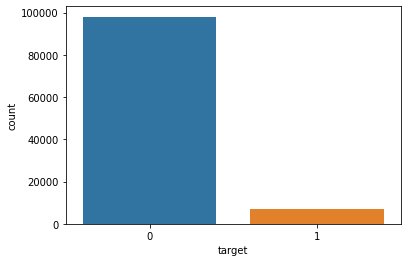

In [ ]:
sns.countplot(x="target", data=train_data)

In [ ]:
print("Доля людей просрочивших кредит: {}".format(train_data["target"].sum() / len(train_data)))

Доля людей просрочивших кредит: 0.06689246401354784


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38876 entries, 0 to 38875
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       38876 non-null  int64  
 1   credit_card_utilization     38876 non-null  float64
 2   age                         38876 non-null  int64  
 3   overdue_30_59_days          38876 non-null  int64  
 4   debt_to_income              38876 non-null  float64
 5   monthly_income              31331 non-null  float64
 6   credits_loans               38876 non-null  int64  
 7   overdue__more_than_90_days  38876 non-null  int64  
 8   mortgage_loans              38876 non-null  int64  
 9   overdue_60_89_days          38876 non-null  int64  
 10  family_members              37921 non-null  float64
dtypes: float64(4), int64(7)
memory usage: 3.3 MB


Есть столбец Index, который отсутствует в train, удалим его.

In [ ]:
test_data = test_data.drop('index',1)

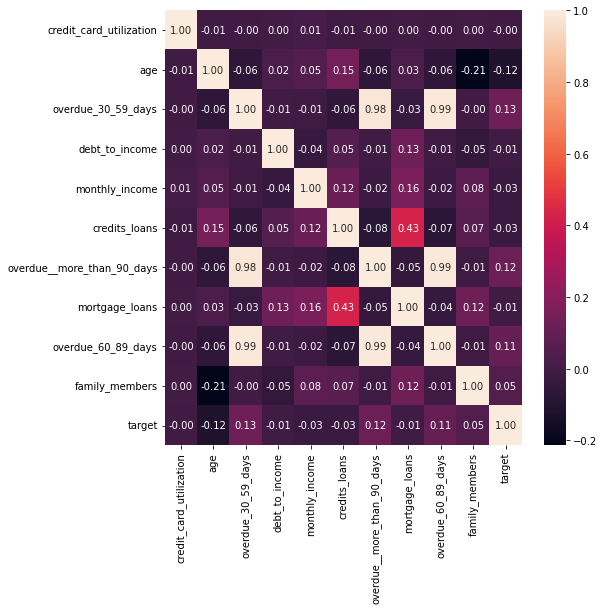

In [ ]:
corr = train_data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, fmt='.2f')

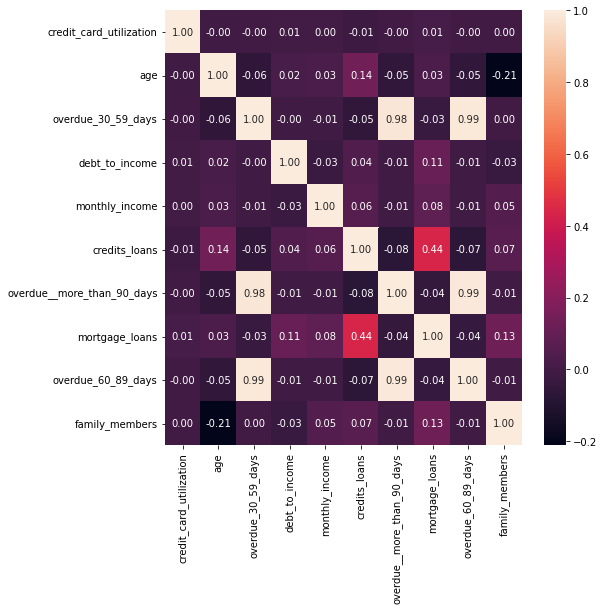

In [ ]:
corr = test_data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, fmt='.2f')

Предыдущие просрочки сильно коррелируют. Средняя связь наблюдается между mortgage_loans и credits_loans.

## EDA

#### Age

In [ ]:
train_data['age'].describe()

count    105109.000000
mean         53.321067
std          14.811007
min           0.000000
25%          42.000000
50%          53.000000
75%          64.000000
max         111.000000
Name: age, dtype: float64

In [ ]:
test_data['age'].describe()

count    38876.000000
mean        53.236238
std         14.772393
min         21.000000
25%         42.000000
50%         53.000000
75%         64.000000
max        110.000000
Name: age, dtype: float64

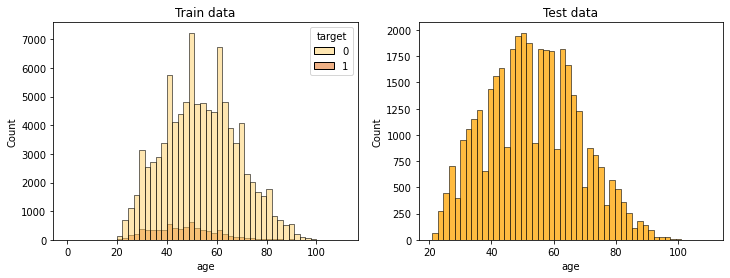

In [ ]:
# гистограмма распределений для train и test
fig, ax =plt.subplots(1,2, figsize=(12,4))
sns.histplot(data=train_data, x='age', hue ='target', bins = 50, palette="YlOrBr", ax=ax[0])
ax[0].set_title("Train data")
sns.histplot(data=test_data, x='age', bins = 50, ax=ax[1], color='orange')
ax[1].set_title("Test data")
fig.show()

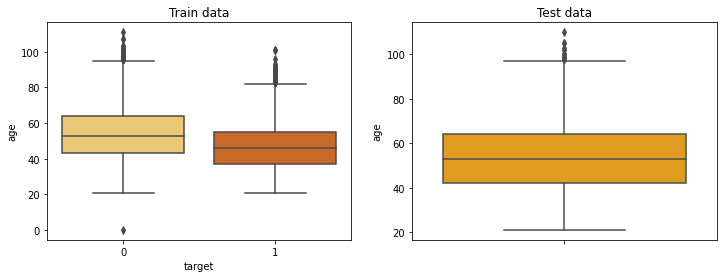

In [ ]:
# boxplot для train и test
fig, ax =plt.subplots(1,2, figsize=(12,4))
sns.boxplot(x="target", y="age", data=train_data, palette="YlOrBr",ax=ax[0])
ax[0].set_title("Train data")
sns.boxplot(data=test_data, y='age', ax=ax[1], color='orange')
ax[1].set_title("Test data")
fig.show()

In [ ]:
train_data[train_data['age']<20]

,credit_card_utilization,age,overdue_30_59_days,debt_to_income,monthly_income,credits_loans,overdue__more_than_90_days,mortgage_loans,overdue_60_89_days,family_members,target
38302,0.780941,0,1,0.423712,5860.305791,6,0,2,0,2.0,0


Люди, которые имеют просрочку, в целом немного моложе. У одного из заемщиков возраст равен нулю, в соотвествии с графиком заменим на медианное значение.

In [ ]:
train_data['age'].replace(0,train_data['age'].median(), inplace = True)

In [ ]:
#sns.scatterplot(data=train_data, x="age", y="target", hue="target",palette="YlOrBr")  # скатерплоты

#### Credit card utilization

In [ ]:
train_data['credit_card_utilization'].describe()

count    105109.000000
mean          5.825173
std         251.021431
min           0.000000
25%           0.029592
50%           0.153792
75%           0.554374
max       48779.730023
Name: credit_card_utilization, dtype: float64

In [ ]:
test_data['credit_card_utilization'].describe()

count    38876.000000
mean         7.143140
std        259.023345
min          0.000000
25%          0.029097
50%          0.152136
75%          0.558911
max      32131.063581
Name: credit_card_utilization, dtype: float64

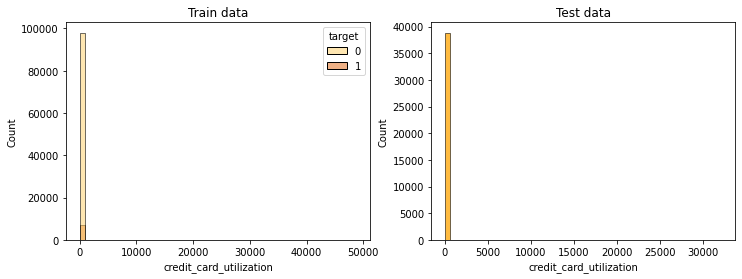

In [ ]:
fig, ax =plt.subplots(1,2, figsize=(12,4))
sns.histplot(data=train_data, x='credit_card_utilization', hue ='target', bins = 50, palette="YlOrBr", ax=ax[0])
ax[0].set_title("Train data")
sns.histplot(data=test_data, x='credit_card_utilization', bins = 50, ax=ax[1], color='orange')
ax[1].set_title("Test data")
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


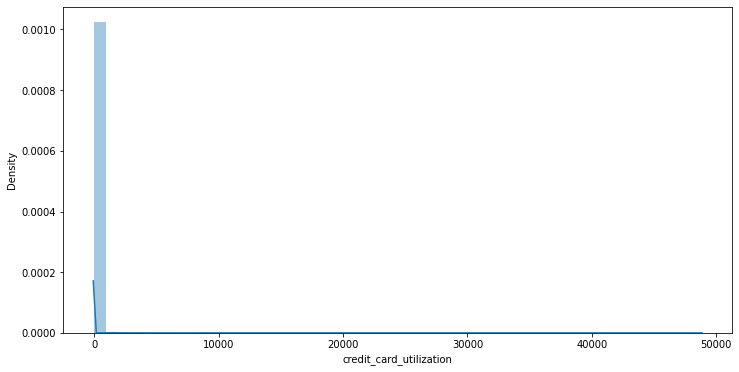

In [ ]:
sns.distplot(train_data['credit_card_utilization'])

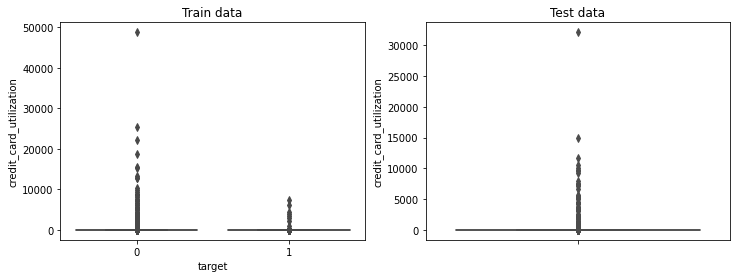

In [ ]:
# boxplot для train и test
fig, ax =plt.subplots(1,2, figsize=(12,4))
sns.boxplot(x="target", y="credit_card_utilization", data=train_data, palette="YlOrBr",ax=ax[0])
ax[0].set_title("Train data")
sns.boxplot(data=test_data, y='credit_card_utilization', ax=ax[1], color='orange')
ax[1].set_title("Test data")
fig.show()

Есть выбросы, определим выбросы (2 варианта z-score, IQR)

In [ ]:
# Z-SCORE
from scipy import stats

In [ ]:
z_train_ccu = np.abs(stats.zscore(train_data['credit_card_utilization']))
print(z_train_ccu)

[0.02320599 0.02252613 0.02184285 ... 0.02300578 0.02142174 0.02095999]


In [ ]:
treshold = 3
ccu_outliers_z = np.where(z_train_ccu>3)
ccu_outliers_z = np.array(ccu_outliers_z)
ccu_outliers_z.shape[1] # кол-во выбросов 137

137

In [ ]:
# IQR
Q1_ccu = train_data['credit_card_utilization'].quantile(0.25)
Q3_ccu = train_data['credit_card_utilization'].quantile(0.75)
IQR_ccu = Q3_ccu - Q1_ccu
print(IQR_ccu)

0.5247824840435227


In [ ]:
lower_tail_ccu = Q1_ccu - 1.5 * IQR_ccu
upper_tail_ccu = Q3_ccu + 1.5 * IQR_ccu

In [ ]:
ccu_outliers_iqr = train_data['credit_card_utilization'][(train_data['credit_card_utilization'] < lower_tail_ccu) | (train_data['credit_card_utilization'] > upper_tail_ccu) == True]
len(ccu_outliers_iqr) # кол-во выбросов 560

560

Остановимся на выбросах подсчитанных по IQR. Позднее заменим выбросы на медианные значения.

In [ ]:
# IQR для test data
Q1_ccu_t = test_data['credit_card_utilization'].quantile(0.25)
Q3_ccu_t = test_data['credit_card_utilization'].quantile(0.75)
IQR_ccu_t = Q3_ccu_t - Q1_ccu_t
print(IQR_ccu_t)

0.5298140436588068


In [ ]:
lower_tail_ccu_t = Q1_ccu_t - 1.5 * IQR_ccu_t
upper_tail_ccu_t = Q3_ccu_t + 1.5 * IQR_ccu_t

In [ ]:
ccu_outliers_iqr_t = test_data['credit_card_utilization'][(test_data['credit_card_utilization'] < lower_tail_ccu_t) | (test_data['credit_card_utilization'] > upper_tail_ccu_t) == True]
len(ccu_outliers_iqr_t) # кол-во выбросов 206

206

#### Credits loans

In [ ]:
train_data['credits_loans'].describe()

count    105109.000000
mean          8.956255
std           5.182715
min           0.000000
25%           5.000000
50%           8.000000
75%          12.000000
max          58.000000
Name: credits_loans, dtype: float64

In [ ]:
test_data['credits_loans'].describe()

count    38876.000000
mean         8.946599
std          5.153647
min          0.000000
25%          5.000000
50%          8.000000
75%         12.000000
max         56.000000
Name: credits_loans, dtype: float64

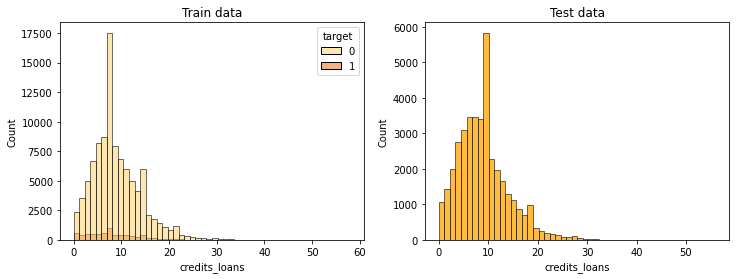

In [ ]:
# гистограмма распределений для train и test
fig, ax =plt.subplots(1,2, figsize=(12,4))
sns.histplot(data=train_data, x='credits_loans', hue ='target', bins = 50, palette="YlOrBr", ax=ax[0])
ax[0].set_title("Train data")
sns.histplot(data=test_data, x='credits_loans', bins = 50, ax=ax[1], color='orange')
ax[1].set_title("Test data")
fig.show()

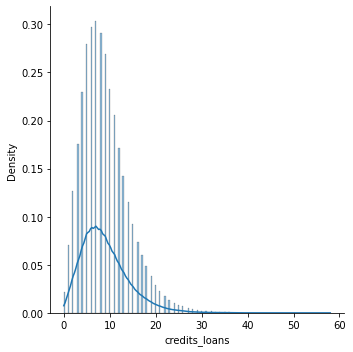

In [ ]:
sns.displot(train_data['credits_loans'],kde=True, stat='density')

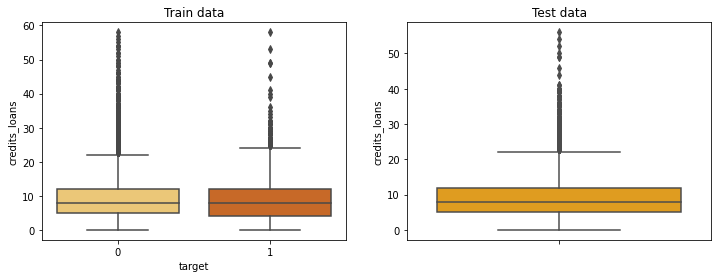

In [ ]:
# boxplot для train и test
fig, ax =plt.subplots(1,2, figsize=(12,4))
sns.boxplot(x="target", y="credits_loans", data=train_data, palette="YlOrBr",ax=ax[0])
ax[0].set_title("Train data")
sns.boxplot(data=test_data, y='credits_loans', ax=ax[1], color='orange')
ax[1].set_title("Test data")
fig.show()

Скошенное вправо распределение без видимых проблем.

#### Mortgage loans

In [ ]:
train_data['mortgage_loans'].describe()

count    105109.000000
mean          1.018514
std           1.136228
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          54.000000
Name: mortgage_loans, dtype: float64

In [ ]:
test_data['mortgage_loans'].describe()

count    38876.000000
mean         1.017466
std          1.113531
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         23.000000
Name: mortgage_loans, dtype: float64

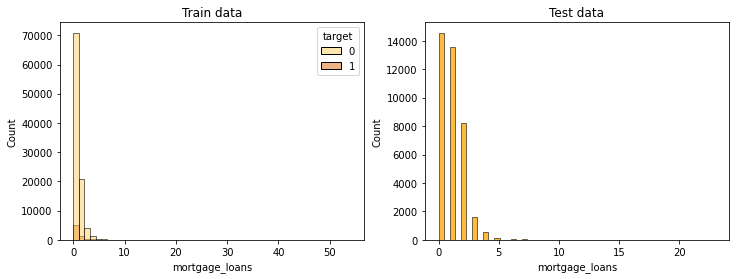

In [ ]:
# гистограмма распределений для train и test
fig, ax =plt.subplots(1,2, figsize=(12,4))
sns.histplot(data=train_data, x='mortgage_loans', hue ='target', bins = 50, palette="YlOrBr", ax=ax[0])
ax[0].set_title("Train data")
sns.histplot(data=test_data, x='mortgage_loans', bins = 50, ax=ax[1], color='orange')
ax[1].set_title("Test data")
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


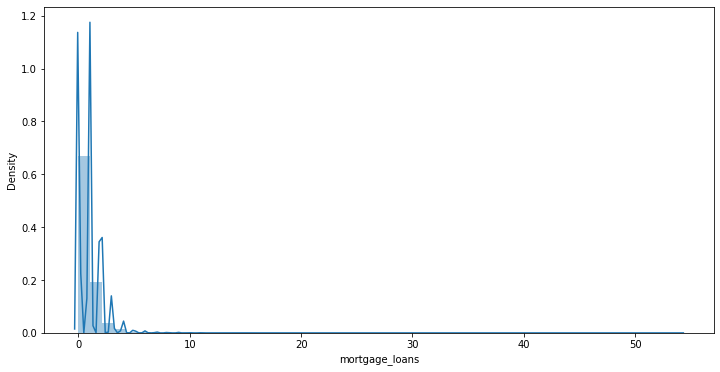

In [ ]:
sns.distplot(train_data['mortgage_loans'])

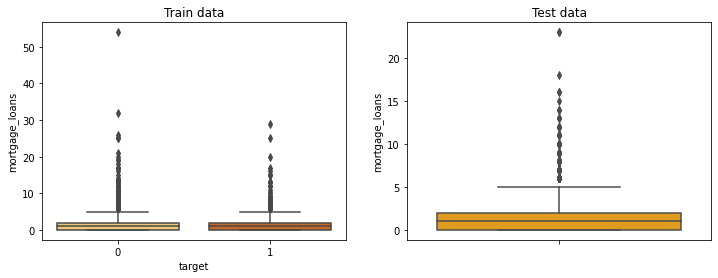

In [ ]:
# boxplot для train и test
fig, ax =plt.subplots(1,2, figsize=(12,4))
sns.boxplot(x="target", y="mortgage_loans", data=train_data, palette="YlOrBr",ax=ax[0])
ax[0].set_title("Train data")
sns.boxplot(data=test_data, y='mortgage_loans', ax=ax[1], color='orange')
ax[1].set_title("Test data")
fig.show()

In [ ]:
train_data[train_data['mortgage_loans']>10]['target'].describe()

count    67.000000
mean      0.223881
std       0.419989
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: target, dtype: float64

#### Debt_to_income

In [ ]:
train_data['debt_to_income'].describe()

count    105109.000000
mean        354.188156
std        1827.184165
min           0.000000
25%           0.173670
50%           0.365047
75%           0.880882
max      323248.210242
Name: debt_to_income, dtype: float64

In [ ]:
test_data['debt_to_income'].describe()

count     38876.000000
mean        351.627896
std        2545.254355
min           0.000000
25%           0.170806
50%           0.361875
75%           0.843592
max      349464.845051
Name: debt_to_income, dtype: float64

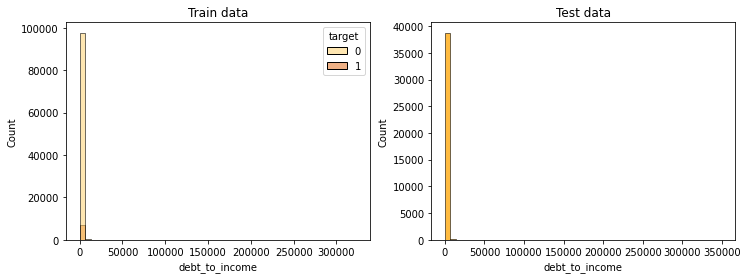

In [ ]:
fig, ax =plt.subplots(1,2, figsize=(12,4))
sns.histplot(data=train_data, x='debt_to_income', hue ='target', bins = 50, palette="YlOrBr", ax=ax[0])
ax[0].set_title("Train data")
sns.histplot(data=test_data, x='debt_to_income', bins = 50, ax=ax[1], color='orange')
ax[1].set_title("Test data")
fig.show()

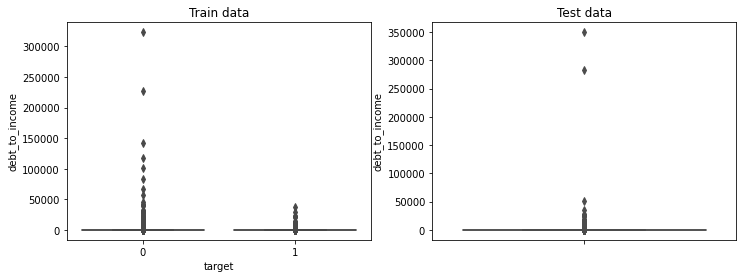

In [ ]:
# boxplot для train и test
fig, ax =plt.subplots(1,2, figsize=(12,4))
sns.boxplot(x="target", y="debt_to_income", data=train_data, palette="YlOrBr",ax=ax[0])
ax[0].set_title("Train data")
sns.boxplot(data=test_data, y='debt_to_income', ax=ax[1], color='orange')
ax[1].set_title("Test data")
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


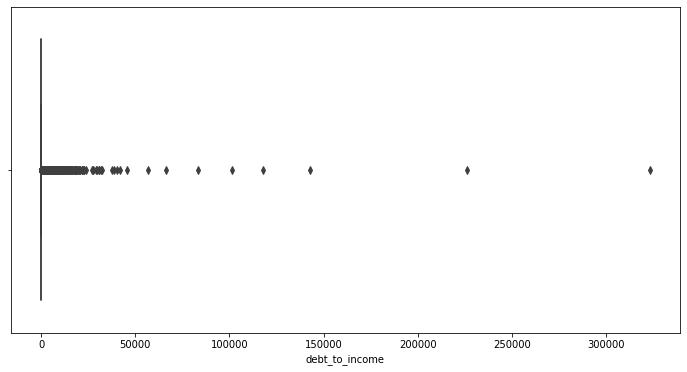

In [ ]:
sns.boxplot(train_data['debt_to_income'])

In [ ]:
train_data[train_data['debt_to_income']>1].describe()

,credit_card_utilization,age,overdue_30_59_days,debt_to_income,monthly_income,credits_loans,overdue__more_than_90_days,mortgage_loans,overdue_60_89_days,family_members,target
count,24954.000000,24954.000000,24954.000000,24954.000000,5179.000000,24954.000000,24954.000000,24954.000000,24954.000000,22484.000000,24954.000000
mean,5.245200,56.002164,0.281558,1490.912703,2307.867432,8.562475,0.150317,1.078424,0.124509,0.437867,0.064278
std,184.993578,14.970932,2.566346,3516.888751,2887.677158,5.129068,2.525144,1.274234,2.502194,0.932976,0.245253
min,0.000000,21.000000,0.000000,1.000012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.021905,45.000000,0.000000,39.087318,0.997813,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.106152,56.000000,0.000000,881.071650,1626.637203,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.488578,66.000000,0.000000,2186.619884,3374.615469,11.000000,0.000000,2.000000,0.000000,0.000000,0.000000
max,22283.019973,111.000000,98.000000,323248.210242,69279.505257,58.000000,98.000000,54.000000,98.000000,10.000000,1.000000


Есть очевидные выбросы. Рассмотрим квантиль 95%.

In [ ]:
train_data[train_data['debt_to_income']>=train_data['debt_to_income'].quantile(0.95)].describe()

,credit_card_utilization,age,overdue_30_59_days,debt_to_income,monthly_income,credits_loans,overdue__more_than_90_days,mortgage_loans,overdue_60_89_days,family_members,target
count,5256.000000,5256.000000,5256.000000,5256.000000,262.000000,5256.000000,5256.000000,5256.000000,5256.000000,4887.000000,5256.000000
mean,6.001989,54.415335,0.274734,4416.141279,0.069272,11.121385,0.064307,1.921994,0.054985,0.534684,0.054224
std,158.434754,11.020907,0.768961,6758.163892,0.256583,5.177911,0.424346,1.210957,0.306948,1.030031,0.226480
min,0.000000,26.000000,0.000000,2450.948271,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040821,46.000000,0.000000,2881.903546,0.000000,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.186145,54.000000,0.000000,3513.316331,0.000000,10.000000,0.000000,2.000000,0.000000,0.000000,0.000000
75%,0.527385,63.000000,0.000000,4648.751126,0.000000,14.000000,0.000000,2.000000,0.000000,1.000000,0.000000
max,7355.387289,96.000000,10.000000,323248.210242,1.152120,44.000000,11.000000,18.000000,5.000000,10.000000,1.000000


У 5256 заемщиков отношение долга к доходу больше чем у 95% выборки, при этом только у 262 есть средний доход, а максимальный средний доход чуть больше 1.

Определим выбросы (IQR).

In [ ]:
# IQR
Q1_dti = train_data['debt_to_income'].quantile(0.25)
Q3_dti = train_data['debt_to_income'].quantile(0.75)
IQR_dti = Q3_dti - Q1_dti
print(IQR_dti)

0.7072115724876591


In [ ]:
lower_tail_dti = Q1_dti - 1.5 * IQR_dti
upper_tail_dti = Q3_dti + 1.5 * IQR_dti

In [ ]:
dti_outliers = train_data['debt_to_income'][(train_data['debt_to_income'] < lower_tail_dti) | (train_data['debt_to_income'] > upper_tail_dti) == True]
print(len(dti_outliers)) # кол-во выбросов 22016 
print(len(dti_outliers)/len(train_data['debt_to_income'])) # 21%

22016
0.20945875234280603


In [ ]:
# IQR для test data
Q1_dti_t = test_data['debt_to_income'].quantile(0.25)
Q3_dti_t = test_data['debt_to_income'].quantile(0.75)
IQR_dti_t = Q3_dti_t - Q1_dti_t

In [ ]:
lower_tail_dti_t = Q1_dti_t - 1.5 * IQR_dti_t
upper_tail_dti_t = Q3_dti_t + 1.5 * IQR_dti_t

In [ ]:
dti_outliers_t = test_data['debt_to_income'][(test_data['debt_to_income'] < lower_tail_dti_t) | (test_data['debt_to_income'] > upper_tail_dti_t) == True]
print(len(dti_outliers_t)) # кол-во выбросов 7966 
print(len(dti_outliers_t)/len(test_data['debt_to_income'])) # 20%

7966
0.20490791233666014


#### Просрочки предыдущие

In [ ]:
overdues_train = pd.concat([train_data['overdue_30_59_days'].value_counts(), train_data['overdue_60_89_days'].value_counts(), train_data['overdue__more_than_90_days'].value_counts()], axis =1)
overdues_train

,overdue_30_59_days,overdue_60_89_days,overdue__more_than_90_days
0,88261.0,99822.0,99322
1,11263.0,4020.0,3622
2,3233.0,744.0,1086
3,1222.0,216.0,461
4,525.0,73.0,209
5,241.0,22.0,99
6,102.0,9.0,48
7,37.0,6.0,24
8,17.0,1.0,18
9,8.0,1.0,13


In [ ]:
train_data[(train_data['overdue_30_59_days']>13) & (train_data['overdue_60_89_days']>13) & (train_data['overdue__more_than_90_days']>13)]

,credit_card_utilization,age,overdue_30_59_days,debt_to_income,monthly_income,credits_loans,overdue__more_than_90_days,mortgage_loans,overdue_60_89_days,family_members,target
320,1.043136,41,98,0.000000,2518.353193,1,98,0,98,1.0,1
393,0.973879,22,98,0.000000,0.000000,1,98,0,98,0.0,0
871,0.904371,28,98,16.418269,NaN,0,98,0,98,NaN,1
874,1.042165,44,98,0.000000,3369.944545,0,98,0,98,0.0,1
1490,1.027200,49,98,0.000000,961.273180,0,98,0,98,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
98676,1.187250,26,98,0.000000,NaN,1,98,0,98,NaN,1
98798,1.003142,26,98,0.000000,1146.208609,0,98,0,98,0.0,1
99266,0.840524,23,98,0.000000,896.011355,1,98,0,98,0.0,0
99997,1.158775,62,98,0.045264,1661.730546,0,98,0,98,0.0,0


In [ ]:
train_data[train_data['overdue_30_59_days']>13]['target'].mean()

0.5670103092783505

In [ ]:
overdues_test = pd.concat([test_data['overdue_30_59_days'].value_counts(), test_data['overdue_60_89_days'].value_counts(), test_data['overdue__more_than_90_days'].value_counts()], axis =1)
overdues_test

,overdue_30_59_days,overdue_60_89_days,overdue__more_than_90_days
0,32649.0,36837.0,36689.0
1,4167.0,1507.0,1402.0
2,1190.0,334.0,393.0
3,472.0,85.0,177.0
4,193.0,28.0,67.0
5,83.0,11.0,28.0
6,32.0,6.0,28.0
7,13.0,3.0,10.0
8,7.0,1.0,3.0
9,4.0,NaN,6.0


Распределения просрочек имеют похожие распредления.  
В просрочках выплат по кредиту от 30 до 59 дней отсутствуют числа от 13 до 96. В просрочках выплат по кредиту от 60 до 89 дней отсутствуют числа от 11 до 96. Есть 194 заемщика с предыдущими просрочками 96 и 98 в overdue_30_59, overdue_60_89, overdue_more_than_90 одновременно, при этом больше половины из них имеют просрочку по факту (target). 

#### NA

In [ ]:
# кол-во пропущенных значений в трейне
train_data.isna().sum()

credit_card_utilization           0
age                               0
overdue_30_59_days                0
debt_to_income                    0
monthly_income                20993
credits_loans                     0
overdue__more_than_90_days        0
mortgage_loans                    0
overdue_60_89_days                0
family_members                 2805
target                            0
dtype: int64

In [ ]:
# кол-во пропущенных значений в тесте
test_data.isna().sum()

credit_card_utilization          0
age                              0
overdue_30_59_days               0
debt_to_income                   0
monthly_income                7545
credits_loans                    0
overdue__more_than_90_days       0
mortgage_loans                   0
overdue_60_89_days               0
family_members                 955
dtype: int64

Пропуски в значениях monthly_income и family_members.

In [ ]:
# доля пропущенных значений в трейне
print('Доля пропущенных значений monthly_income:', train_data['monthly_income'].isna().mean())
print('Доля пропущенных значений family_members:', train_data['family_members'].isna().mean())

Доля пропущенных значений monthly_income: 0.19972599872513297
Доля пропущенных значений family_members: 0.026686582500071356


Приблизительно 20% значений monthly_income пропущены, 2,7% значений family_members пропущены.

In [ ]:
# доля пропущенных значений в тесте
print('Доля пропущенных значений monthly_income:', test_data['monthly_income'].isna().mean())
print('Доля пропущенных значений family_members:', test_data['family_members'].isna().mean())

Доля пропущенных значений monthly_income: 0.19407860891038173
Доля пропущенных значений family_members: 0.024565284494289536


Приблизительно 19,4% значений monthly_income пропущены, 2,5% значений family_members пропущены.

In [ ]:
# статистика по данным столбцам
train_data[['monthly_income','family_members']].describe()

,monthly_income,family_members
count,8.411600e+04,102304.000000
mean,6.649725e+03,0.757096
std,1.106504e+04,1.116525
min,0.000000e+00,0.000000
25%,3.343201e+03,0.000000
50%,5.361778e+03,0.000000
75%,8.207866e+03,1.000000
max,1.359526e+06,20.000000


In [ ]:
test_data[['monthly_income','family_members']].describe()

,monthly_income,family_members
count,3.133100e+04,37921.000000
mean,6.726128e+03,0.759131
std,2.116051e+04,1.112832
min,0.000000e+00,0.000000
25%,3.349846e+03,0.000000
50%,5.339619e+03,0.000000
75%,8.264207e+03,1.000000
max,3.117341e+06,9.000000


##### Monthly income

**Доход по возрасту**

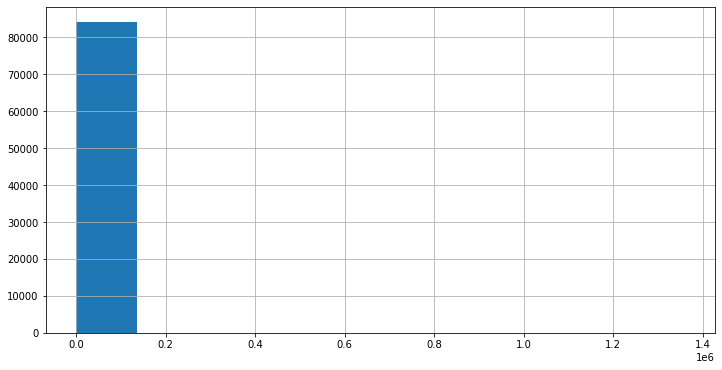

In [ ]:
train_data['monthly_income'].hist()

Разобъем людей по возрастным группам, посмотрим на их месячный доход.

In [ ]:
#def age_group(age):
 # if age < 30:
  #  return 'young adult'
  #elif (age >= 30) & (age < 65):
   # return 'adult'
  #else:
   # return 'pensioner'

In [ ]:
#train_data['age_group'] = train_data['age'].apply(age_group)
#train_data

In [ ]:
# статистика месячного дохода по возрастным группам
#train_data.groupby(by='age_group')['monthly_income'].describe()

Можно заполнить пропуски просто медианным значением. Можно заполнить медианами для каждой возрастной группы.

**Долг к доходу и месячный доход**



Посмотрим на отношение долга к доходу у людей, у которых пропущенные значения в месячном доходе. 

In [ ]:
train_data[train_data['monthly_income'].isna()]['debt_to_income'].describe()

count     20993.000000
mean       1665.181258
std        3718.243037
min           0.000000
25%         122.494258
50%        1144.248282
75%        2374.215943
max      323248.210242
Name: debt_to_income, dtype: float64

Посмотрим на месячный доход людей с высоким долгом к доходу.

In [ ]:
# месячный доход людей с высоким значением отношения долга к доходам
train_data[(train_data['debt_to_income']>100) & (train_data['monthly_income'].isna()==False)]['monthly_income'].describe()

count    1196.000000
mean        0.679820
std        12.401829
min         0.000000
25%         0.000000
50%         0.000000
75%         0.859682
max       427.982228
Name: monthly_income, dtype: float64

В среднем люди с большим отношением долга к доходу имеют нулевой месячный доход.

Поскольку люди с высоким долгом к доходу имеют в среднем месячный доход равный нулю, а люди с пропущенным значением имеют в среднем высокое отношение долга к доходу можно заполнить нулями.

##### Кол-во членов семьи



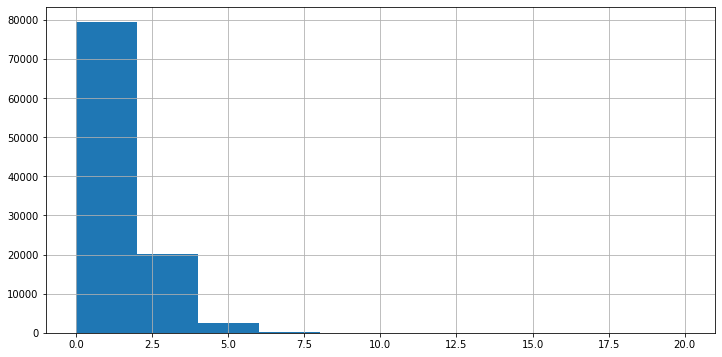

In [ ]:
train_data['family_members'].hist()

In [ ]:
train_data['family_members'].mode()

0    0.0
dtype: float64

Чаще всего у заемщиков 0 членов семьи, в среднем также 0 членов семьи. Заполним нулями данные пропуски.

* Доп. визуалиазация

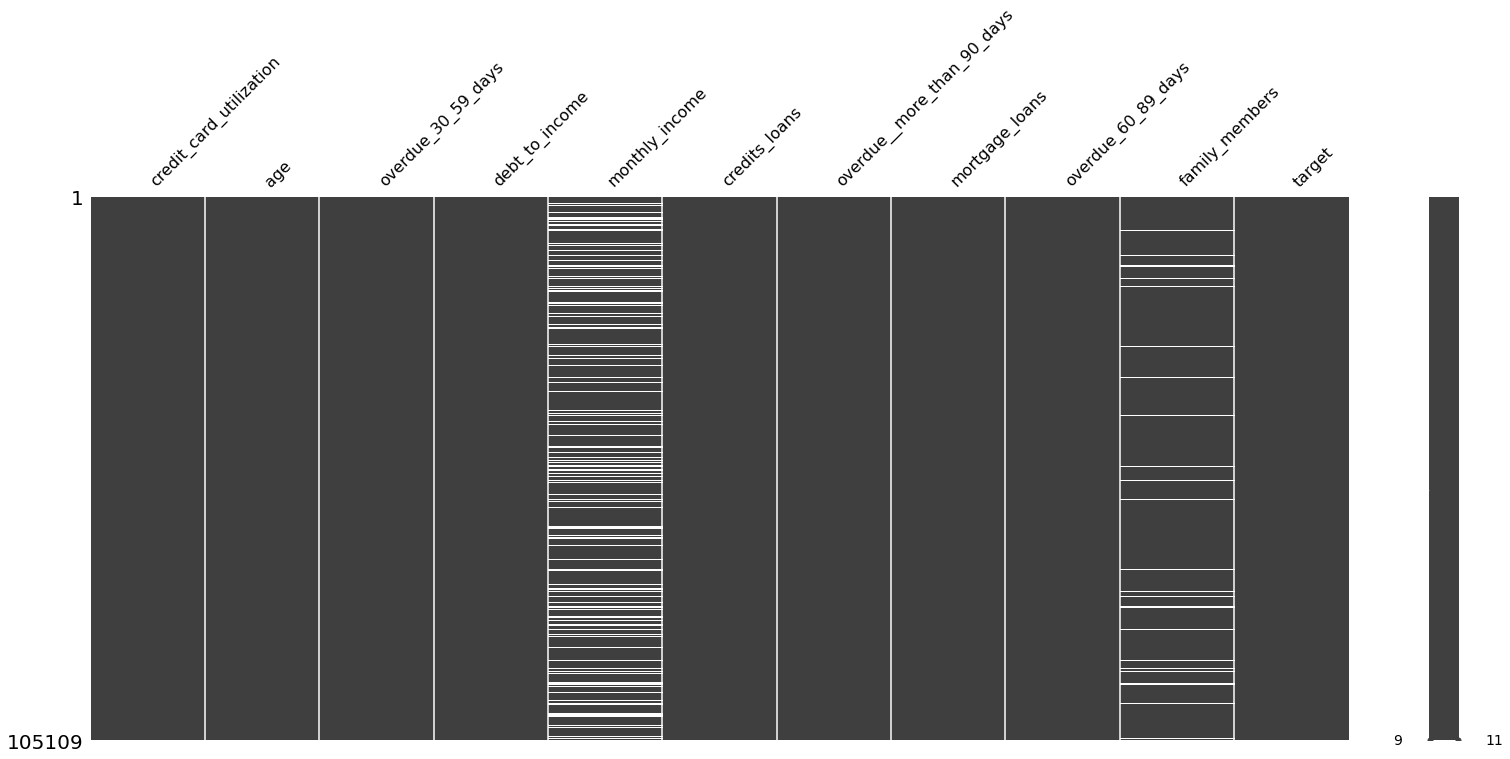

In [ ]:
import missingno as msno
msno.matrix(train_data)

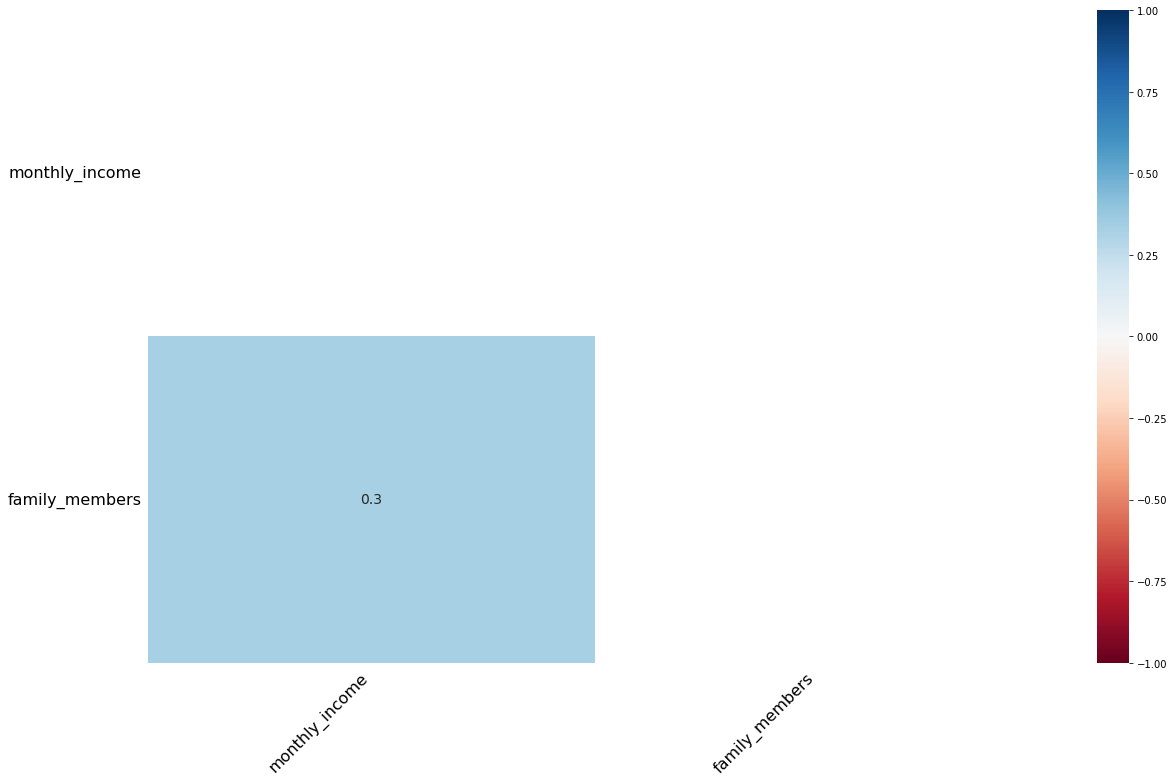

In [ ]:
msno.heatmap(train_data)

## Preprocessing

### Обработаем выбросы

Credit card utilization & debt to income. Заменим выбросы на медианные значения.
(при замене на крайние значения +-1.5IQR качество хуже)

**Credit card utilization**

In [ ]:
train_data['credit_card_utilization'] = np.where((train_data['credit_card_utilization'] < lower_tail_ccu) | (train_data['credit_card_utilization'] > upper_tail_ccu), train_data['credit_card_utilization'].median(), train_data['credit_card_utilization'])
test_data['credit_card_utilization'] = np.where((test_data['credit_card_utilization'] < lower_tail_ccu_t) | (test_data['credit_card_utilization'] > upper_tail_ccu_t), test_data['credit_card_utilization'].median(), test_data['credit_card_utilization'])

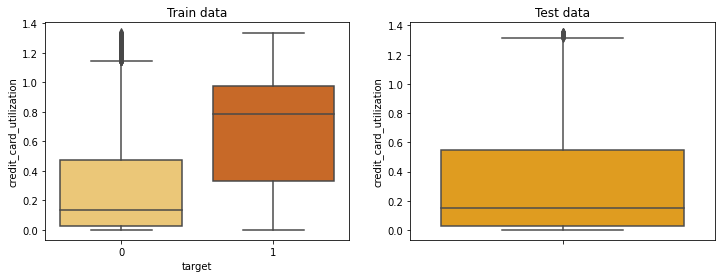

In [ ]:
# новый boxplot для train и test
fig, ax =plt.subplots(1,2, figsize=(12,4))
sns.boxplot(x="target", y="credit_card_utilization", data=train_data, palette="YlOrBr",ax=ax[0])
ax[0].set_title("Train data")
sns.boxplot(data=test_data, y='credit_card_utilization', ax=ax[1], color='orange')
ax[1].set_title("Test data")
fig.show()

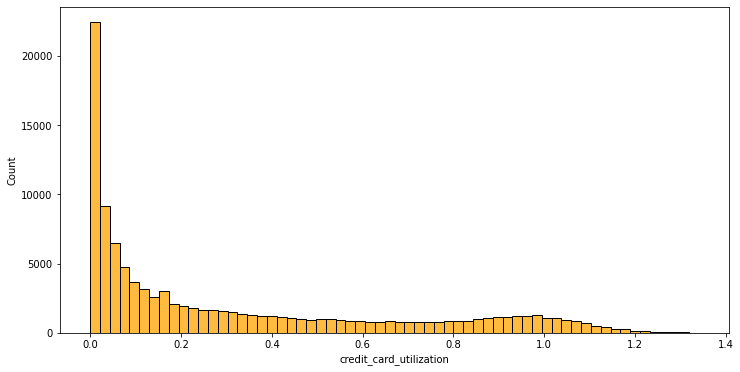

In [ ]:
sns.histplot(data=train_data, x='credit_card_utilization',  color='orange')

**Debt to income**

In [ ]:
train_data['debt_to_income'] = np.where((train_data['debt_to_income'] < lower_tail_dti) | (train_data['debt_to_income'] > upper_tail_dti), train_data['debt_to_income'].median(), train_data['debt_to_income'])
test_data['debt_to_income'] = np.where((test_data['debt_to_income'] < lower_tail_dti_t) | (test_data['debt_to_income'] > upper_tail_dti_t), test_data['debt_to_income'].median(), test_data['debt_to_income'])

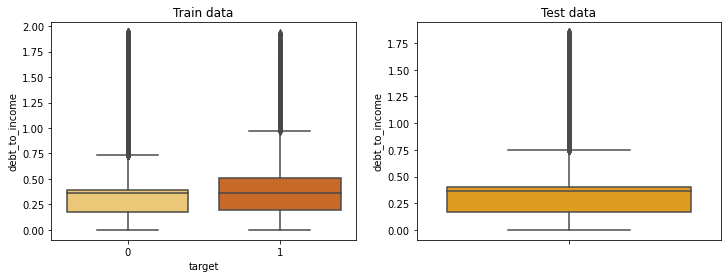

In [ ]:
# новый boxplot для train и test
fig, ax =plt.subplots(1,2, figsize=(12,4))
sns.boxplot(x="target", y="debt_to_income", data=train_data, palette="YlOrBr",ax=ax[0])
ax[0].set_title("Train data")
sns.boxplot(data=test_data, y='debt_to_income', ax=ax[1], color='orange')
ax[1].set_title("Test data")
fig.show()

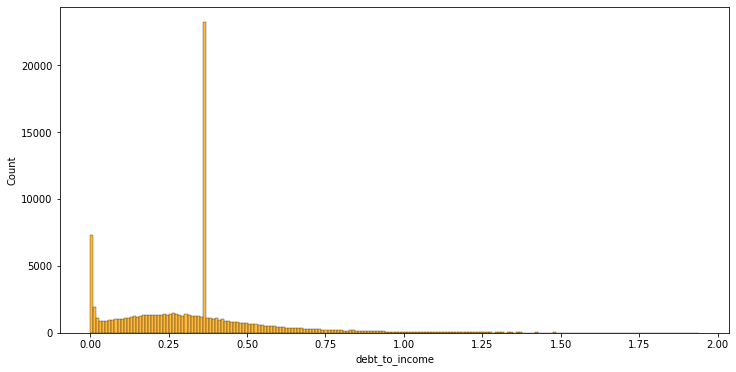

In [ ]:
sns.histplot(data=train_data, x='debt_to_income',  color='orange')

### Заполним пропуски

In [ ]:
# заполним family_members модой, она же равна 0
train_data['family_members']=train_data['family_members'].fillna(train_data['family_members'].mode()[0])
test_data['family_members']=test_data['family_members'].fillna(test_data['family_members'].mode()[0])

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105109 entries, 0 to 105108
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   credit_card_utilization     105109 non-null  float64
 1   age                         105109 non-null  int64  
 2   overdue_30_59_days          105109 non-null  int64  
 3   debt_to_income              105109 non-null  float64
 4   monthly_income              84116 non-null   float64
 5   credits_loans               105109 non-null  int64  
 6   overdue__more_than_90_days  105109 non-null  int64  
 7   mortgage_loans              105109 non-null  int64  
 8   overdue_60_89_days          105109 non-null  int64  
 9   family_members              105109 non-null  float64
 10  target                      105109 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 8.8 MB


Заполним пропуски в месячном доходе двумя способами
* медианным значением
* нулями
и сравним качество, чтобы выбрать лучший способ.

In [ ]:

# X_zeroes = train_data.fillna(0)
# X_median = train_data.fillna(train_data['monthly_income'].median())

# (X_train_zeroes, 
#  X_test_zeroes, 
#  y_train, y_test) = train_test_split(X_zeroes, y, 
#                                      test_size=0.2, 
#                                      random_state=0)
# (X_train_median, 
#  X_test_median) = train_test_split(X_median, 
#                                       test_size=0.2, 
#                                       random_state=0)

# scaler = StandardScaler()
# X_train_zer_scaled = scaler.fit_transform(X_train_zeroes,y_train)
# X_test_zer_scaled = scaler.fit_transform(X_test_zeroes,y_test)
# X_train_med_scaled = scaler.fit_transform(X_train_median,y_train)
# X_test_med_scaled = scaler.fit_transform(X_test_median,y_test)

# lr = LogisticRegression(random_state=0, class_weight='balanced')
# param_grid = {'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]}

# ### выборка с нулями ###
# optimizer1 = GridSearchCV(lr, param_grid=param_grid,cv=3)
# optimizer1.fit(X_train_zer_scaled,y_train)
# print(optimizer1.best_estimator_)

# ### выборка с медианами ###
# optimizer2 = GridSearchCV(lr, param_grid=param_grid,cv=3)
# optimizer2.fit(X_train_med_scaled,y_train)
# print(optimizer2.best_estimator_)

# auc1 = roc_auc_score(y_test, optimizer1.predict_proba(X_test_zer_scaled)[:, 1])
# print(auc1) #0.8284339947787289
# auc2 = roc_auc_score(y_test, optimizer2.predict_proba(X_test_med_scaled)[:, 1])
# print(auc2) #0.8289675312575107



Качество на заполненной медианами выборке немного лучше, в дальнейшем будем работать с ней.

In [ ]:
y = train_data['target']
X = train_data.drop('target', 1)

In [ ]:
# заполним monthly_income медианой
X['monthly_income']=X['monthly_income'].fillna(X['monthly_income'].median())

In [ ]:
# заполним monthly_income медианой в test
test_data['monthly_income']=test_data['monthly_income'].fillna(test_data['monthly_income'].median())

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38876 entries, 0 to 38875
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit_card_utilization     38876 non-null  float64
 1   age                         38876 non-null  int64  
 2   overdue_30_59_days          38876 non-null  int64  
 3   debt_to_income              38876 non-null  float64
 4   monthly_income              38876 non-null  float64
 5   credits_loans               38876 non-null  int64  
 6   overdue__more_than_90_days  38876 non-null  int64  
 7   mortgage_loans              38876 non-null  int64  
 8   overdue_60_89_days          38876 non-null  int64  
 9   family_members              38876 non-null  float64
dtypes: float64(4), int64(6)
memory usage: 3.0 MB


# Models

In [ ]:
# разобъем на train, val
(X_train, 
X_val,y_train, y_val) = train_test_split(X, y, test_size=0.2, random_state=0, stratify = y)

In [ ]:
# масштабируем
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train,y_train)
X_val_scaled = scaler.fit_transform(X_val,y_val)

## **Logistic Regression**

Populating the interactive namespace from numpy and matplotlib


<function matplotlib.pyplot.show>

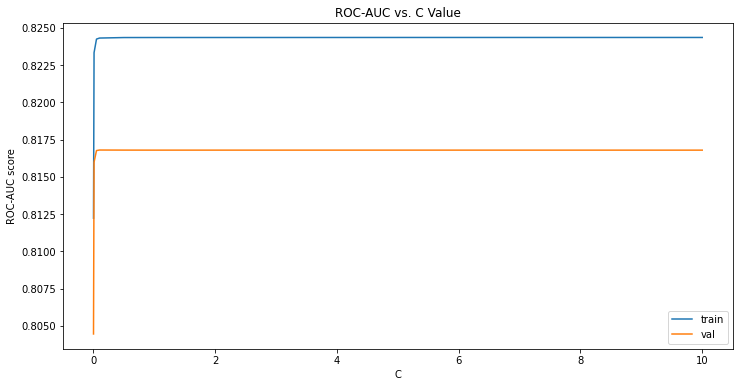

In [ ]:
c_range = [0.001,0.01, 0.05, 0.1, 0.5, 1, 5, 10]
train_results = []
val_results = []
for c in c_range:
   lr = LogisticRegression(random_state=0, class_weight='balanced', C=c)
   lr.fit(X_train_scaled, y_train)
   
   roc_auc_tr = roc_auc_score(y_train, lr.predict_proba(X_train_scaled)[:, 1])
   train_results.append(roc_auc_tr)
   
   roc_auc_v = roc_auc_score(y_val, lr.predict_proba(X_val_scaled)[:, 1])
   val_results.append(roc_auc_v)

%pylab inline
plt.figure(figsize(12,6))
plt.plot(c_range,train_results,label="train")
plt.plot(c_range,val_results,label="val")
plt.title('ROC-AUC vs. C Value')
plt.ylabel('ROC-AUC score')
plt.xlabel('C')
plt.legend()
plt.show

In [ ]:
lr = LogisticRegression(random_state=0, class_weight='balanced')
param_grid = {'C': [0.001,0.01, 0.05, 0.1, 0.5, 1, 5, 10]}

optimizer = GridSearchCV(lr, param_grid=param_grid,cv=5, scoring='roc_auc')
optimizer.fit(X_train_scaled,y_train)
print(optimizer.best_estimator_)

LogisticRegression(C=5, class_weight='balanced', random_state=0)


In [ ]:
lr1 = LogisticRegression(C=5, class_weight='balanced', random_state=0)
lr1.fit(X_train_scaled,y_train)

LogisticRegression(C=5, class_weight='balanced', random_state=0)

In [ ]:
# оценка модели
results = cross_validate(estimator=optimizer, X=X_val_scaled, y=y_val, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])
results

{'fit_time': array([3.15798545, 3.15995598, 3.26611209, 3.3980372 , 3.31202483]),
 'score_time': array([0.01620507, 0.01714873, 0.01650262, 0.01662779, 0.01671195]),
 'test_accuracy': array([0.79453032, 0.76242568, 0.77711703, 0.78686965, 0.78068506]),
 'test_f1': array([0.31968504, 0.28591851, 0.31355311, 0.31498471, 0.31091181]),
 'test_precision': array([0.20525784, 0.17905103, 0.19741697, 0.20058423, 0.19678335]),
 'test_recall': array([0.72241993, 0.70921986, 0.76156584, 0.73309609, 0.74021352]),
 'test_roc_auc': array([0.82872985, 0.82391443, 0.84307347, 0.84028764, 0.84924476])}

In [ ]:
# оценка модели средние значения
results1 = pd.DataFrame.from_dict(results)
results1.mean()

fit_time          3.258823
score_time        0.016639
test_accuracy     0.780326
test_precision    0.195819
test_recall       0.733303
test_f1           0.309011
test_roc_auc      0.837050
dtype: float64

In [ ]:
# roc_auc_score
auc_lr = roc_auc_score(y_val, optimizer.predict_proba(X_val_scaled)[:, 1])
print(auc_lr) # 0.8167971569061978

0.8167971569061978


In [ ]:
# classification report
print(classification_report(y_val, optimizer.predict(X_val_scaled)))

              precision    recall  f1-score   support

           0       0.97      0.76      0.86     19616
           1       0.18      0.72      0.29      1406

    accuracy                           0.76     21022
   macro avg       0.58      0.74      0.57     21022
weighted avg       0.92      0.76      0.82     21022



In [ ]:
# confusion matrix
cf_matrix=confusion_matrix(y_val, optimizer.predict(X_val_scaled))
print(cf_matrix)

[[14973  4643]
 [  387  1019]]


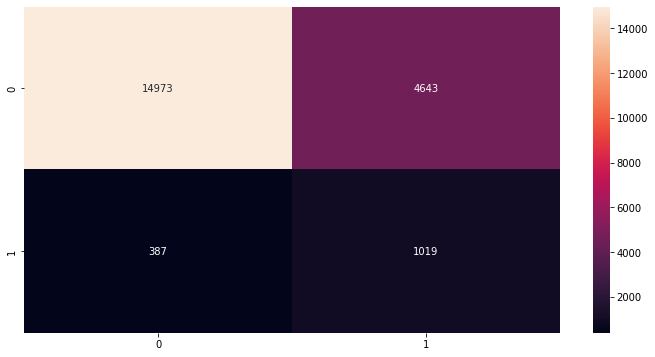

In [ ]:
sns.heatmap(cf_matrix, annot=True,fmt="d")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


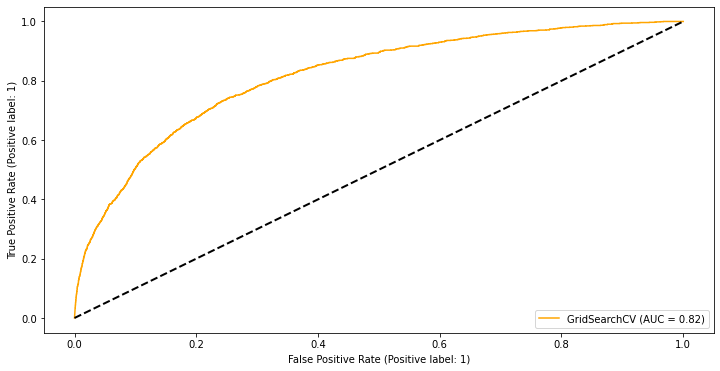

In [ ]:
# roc auc curve
metrics.plot_roc_curve(optimizer, X_val_scaled, y_val, color = 'orange')
plt.plot([0, 1], [0, 1], color="black", lw=2, linestyle="--") 

In [ ]:
# предсказание
y_pred_lr = optimizer.predict_proba(test_data.to_numpy())[:, 1]
y_pred_lr

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
lr1.coef_  # коэффициенты регрессии

array([[ 0.77753438, -0.31120127,  1.62743612,  0.1268483 , -0.17289047,
         0.11655331,  1.34213859,  0.03559352, -0.78660263,  0.07031163]])

In [ ]:
params = np.append(lr1.intercept_,lr1.coef_)
predictions = lr1.predict(X_val_scaled)

newX = pd.DataFrame({"Constant":np.ones(len(X_val_scaled))}).join(pd.DataFrame(X_val_scaled))
MSE = (sum((y_val-predictions)**2))/(len(newX)-len(newX.columns))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilities"] = [params,sd_b,ts_b,p_values]
print(myDF3)

    Coefficients  Standard Errors  t values  Probabilities
0        -0.5096            0.003  -151.020            NaN
1         0.7775            0.004   213.943            NaN
2        -0.3112            0.004   -86.043            NaN
3         1.6274            0.022    74.127            NaN
4         0.1268            0.004    33.051            NaN
5        -0.1729            0.003   -49.886            NaN
6         0.1166            0.004    29.855            NaN
7         1.3421            0.030    45.412            NaN
8         0.0356            0.004     8.762            NaN
9        -0.7866            0.033   -24.199            NaN
10        0.0703            0.004    20.029            NaN


Для класса 1 (возврат не вовремя):
Recall = 0.72 - неплохо обнаруживает класс в целом, precision  = 0.18 - плохо отличает класс от другого, поскольку классы не сбалансированны. AUC = 0.82 - вполне хороший результат. Больше всего влияют факторы (credit_card_utilization, overdue_30_59_days, overdue__more_than_90_days, overdue_60_89_days)

*Kaggle public score  0.55980*  
*Kaggle private score 0.54360*

## **KNN**

In [ ]:
knn = KNeighborsClassifier()
param_grid_knn = {'n_neighbors': np.arange(1,6)}
optimizer_knn = GridSearchCV(knn, param_grid=param_grid_knn,cv=5,scoring='roc_auc')
optimizer_knn.fit(X_train_scaled,y_train)
print(optimizer_knn.best_estimator_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


In [ ]:
optimizer_knn.best_score_

0.6876013398861407

Populating the interactive namespace from numpy and matplotlib


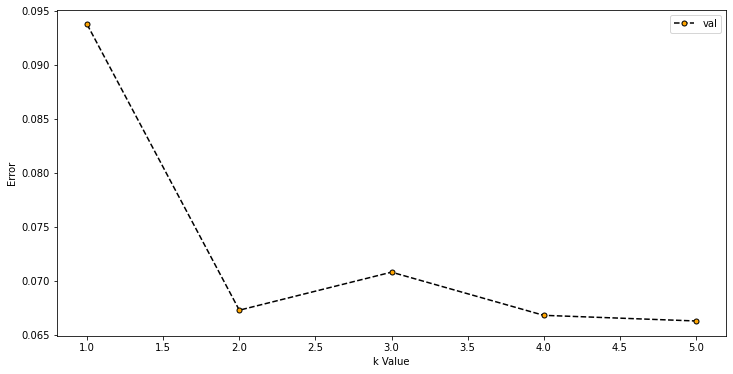

Minimum error test: 0.06631148320806773 at K = 5


In [ ]:
# визуализация ошибки
error1= []
error2= []

for k in range(1,6):
    #print(k)  
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled,y_train)
    y_pred1= knn.predict(X_train_scaled)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(X_val_scaled)
    error2.append(np.mean(y_val!= y_pred2))
%pylab inline
plt.figure(figsize(12,6))
#plt.plot(range(1,51),error1,label="train",color = 'black',linestyle='dashed', 
#         marker='o',markerfacecolor='blue', markersize=5)
plt.plot(range(1,6),error2,label="val", color = 'black',linestyle='dashed', 
         marker='o',markerfacecolor='orange', markersize=5)
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()
plt.show()
print("Minimum error test:",min(error2),"at K =",error2.index(min(error2))+1)

Populating the interactive namespace from numpy and matplotlib
Maximum ROC-AUC: 0.6896477263893498 at K = 5


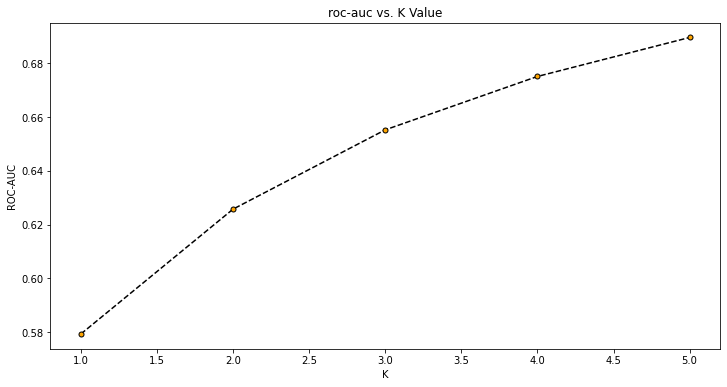

In [ ]:
# визуализация roc_auc
auc = []

from sklearn import metrics
for k in range(1,6):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled,y_train)
    auc.append(roc_auc_score(y_val, knn.predict_proba(X_val_scaled)[:, 1]))

%pylab inline    
plt.figure(figsize=(12,6))
plt.plot(range(1,6),auc,color = 'black',linestyle='dashed', 
         marker='o',markerfacecolor='orange', markersize=5)
plt.title('roc-auc vs. K Value')
plt.xlabel('K')
plt.ylabel('ROC-AUC')
plt.show
print("Maximum ROC-AUC:",max(auc),"at K =",auc.index(max(auc))+1)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# оценка модели
results = cross_validate(estimator=knn, X=X_train_scaled, y=y_train, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])
results

{'fit_time': array([2.24168468, 2.14129686, 2.00897193, 2.06439781, 2.21684575]),
 'score_time': array([7.64540076, 6.66509056, 6.9058404 , 6.65386057, 6.83618069]),
 'test_accuracy': array([0.9326317 , 0.9326317 , 0.93072486, 0.93280609, 0.93072486]),
 'test_f1': array([0.15510813, 0.18430526, 0.17081851, 0.15922619, 0.13895048]),
 'test_precision': array([0.48148148, 0.48484848, 0.42857143, 0.48858447, 0.4122807 ]),
 'test_recall': array([0.09244444, 0.11377778, 0.10666667, 0.09511111, 0.08355556]),
 'test_roc_auc': array([0.67760649, 0.69726604, 0.6850241 , 0.69302643, 0.68508364])}

In [ ]:
auc_knn = roc_auc_score(y_val, knn.predict_proba(X_val_scaled)[:, 1])
print(auc_knn)

0.6896477263893498


In [ ]:
y_pred_knn = knn.predict_proba(test_data)[:, 1]
y_pred_knn

array([0., 0., 0., ..., 0., 0., 0.])

Большой диапазон

In [ ]:
error1= []
error2= []

for k in range(1,51):
    print(k)  
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled,y_train)
    y_pred1= knn.predict(X_train_scaled)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(X_val_scaled)
    error2.append(np.mean(y_val!= y_pred2))

Populating the interactive namespace from numpy and matplotlib


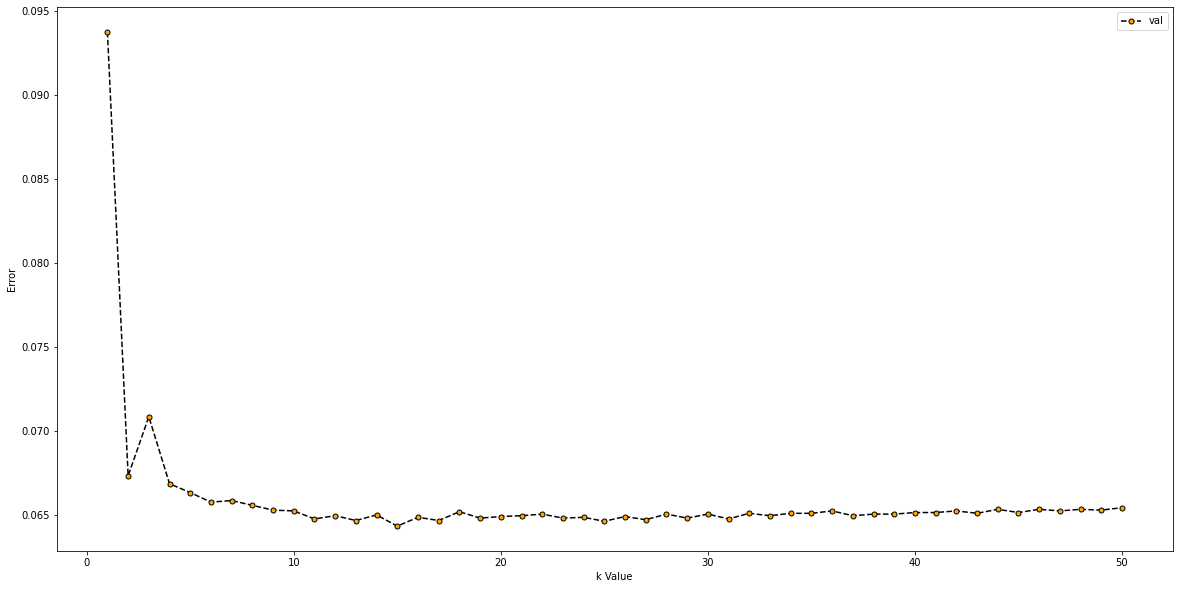

Minimum error test: 0.06431357625344877 at K = 15


In [ ]:
%pylab inline
plt.figure(figsize(20,10))
#plt.plot(range(1,51),error1,label="train",color = 'black',linestyle='dashed', 
#         marker='o',markerfacecolor='blue', markersize=5)
plt.plot(range(1,51),error2,label="val", color = 'black',linestyle='dashed', 
         marker='o',markerfacecolor='orange', markersize=5)
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()
plt.show()
print("Minimum error test:",min(error2),"at K =",error2.index(min(error2))+1)

In [ ]:
auc = []

from sklearn import metrics
for k in range(1,51):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled,y_train)
    auc.append(roc_auc_score(y_val, knn.predict_proba(X_val_scaled)[:, 1]))

Populating the interactive namespace from numpy and matplotlib
Maximum ROC-AUC: 0.7955197291554026 at K = 50


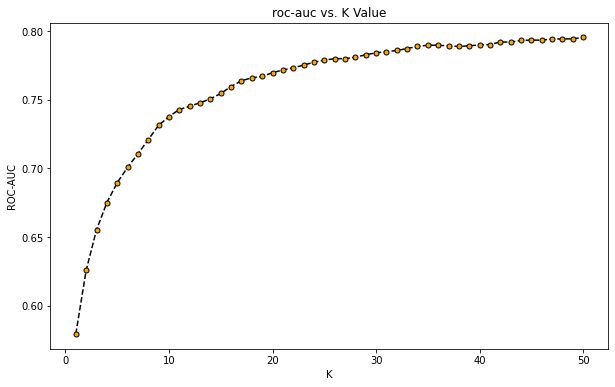

In [ ]:
%pylab inline    
plt.figure(figsize=(10,6))
plt.plot(range(1,51),auc,color = 'black',linestyle='dashed', 
         marker='o',markerfacecolor='orange', markersize=5)
plt.title('roc-auc vs. K Value')
plt.xlabel('K')
plt.ylabel('ROC-AUC')
plt.show
print("Maximum ROC-AUC:",max(auc),"at K =",auc.index(max(auc))+1)

In [ ]:
knn1 = KNeighborsClassifier()
param_grid_knn1 = {'n_neighbors': np.arange(1,100)}
optimizer_knn1 = GridSearchCV(knn1, param_grid=param_grid_knn1,cv=5,scoring='roc_auc')
optimizer_knn1.fit(X_train_scaled,y_train)
print(optimizer_knn1.best_estimator_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=98, p=2,
                     weights='uniform')


In [ ]:
optimizer_knn1.best_score_

0.8087754996834342

In [ ]:
knn1 = KNeighborsClassifier(n_neighbors=98)
knn1.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=98)

In [ ]:
# оценка модели
results = cross_validate(estimator=knn1, X=X_val_scaled, y=y_val, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])
results

{'fit_time': array([0.02536702, 0.02446032, 0.02357411, 0.02507305, 0.02379489]),
 'score_time': array([2.24342608, 2.24534321, 2.15271902, 2.24684191, 2.26486611]),
 'test_accuracy': array([0.93436385, 0.93365042, 0.93339676, 0.93411037, 0.9338725 ]),
 'test_f1': array([0.05479452, 0.02787456, 0.02777778, 0.03484321, 0.04137931]),
 'test_precision': array([0.72727273, 0.8       , 0.57142857, 0.83333333, 0.66666667]),
 'test_recall': array([0.02846975, 0.0141844 , 0.01423488, 0.01779359, 0.02135231]),
 'test_roc_auc': array([0.78797735, 0.78483412, 0.79238554, 0.78865718, 0.78798227])}

In [ ]:
# оценка модели средние значения
results1 = pd.DataFrame.from_dict(results)
results1.mean()

fit_time          0.024454
score_time        2.230639
test_accuracy     0.933879
test_precision    0.719740
test_recall       0.019207
test_f1           0.037334
test_roc_auc      0.788367
dtype: float64

In [ ]:
auc_knn1 = roc_auc_score(y_val, knn1.predict_proba(X_val_scaled)[:, 1])
print(auc_knn1)

0.8056520180350351


In [ ]:
# classification report
print(classification_report(y_val, knn1.predict(X_val_scaled)))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97     19616
           1       0.82      0.02      0.03      1406

    accuracy                           0.93     21022
   macro avg       0.88      0.51      0.50     21022
weighted avg       0.93      0.93      0.90     21022



In [ ]:
# confusion matrix
cf_matrix=confusion_matrix(y_val, knn1.predict(X_val_scaled))
print(cf_matrix)

[[19611     5]
 [ 1383    23]]


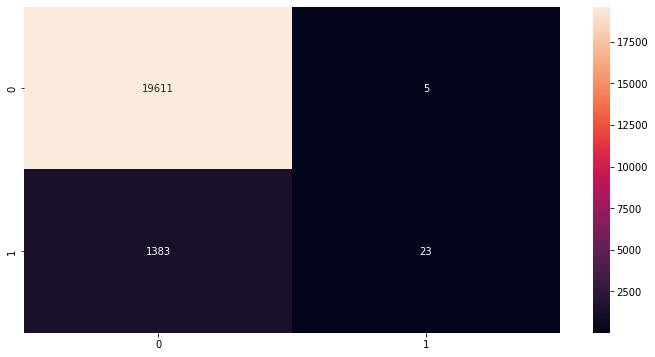

In [ ]:
sns.heatmap(cf_matrix, annot=True,fmt="d")	

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


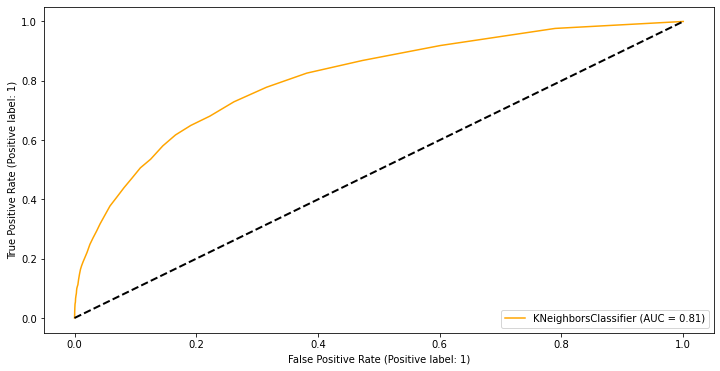

In [ ]:
# roc auc curve
metrics.plot_roc_curve(knn1, X_val_scaled, y_val, color = 'orange')
plt.plot([0, 1], [0, 1], color="black", lw=2, linestyle="--")

In [ ]:
y_pred_knn1 = knn1.predict_proba(test_data.to_numpy())[:, 1]
y_pred_knn1

array([0.03061224, 0.03061224, 0.03061224, ..., 0.03061224, 0.03061224,
       0.03061224])

Не смотря на AUC = 0.81, KNN не обнаруживает 1 класс в целом (Recall = 0.02), но отличает этот класс от класса 0 хорошо (Precission = 0.82).

*Kaggle public score  0.50147*  
*Kaggle private score 0.50111*


## **Decision tree**

In [ ]:
dt = tree.DecisionTreeClassifier(random_state=0)
dt.fit(X_train_scaled, y_train)
roc_auc_score(y_val, dt.predict_proba(X_val_scaled)[:, 1])

0.6044241107790197

Посмотрим на параметры

Populating the interactive namespace from numpy and matplotlib


<function matplotlib.pyplot.show>

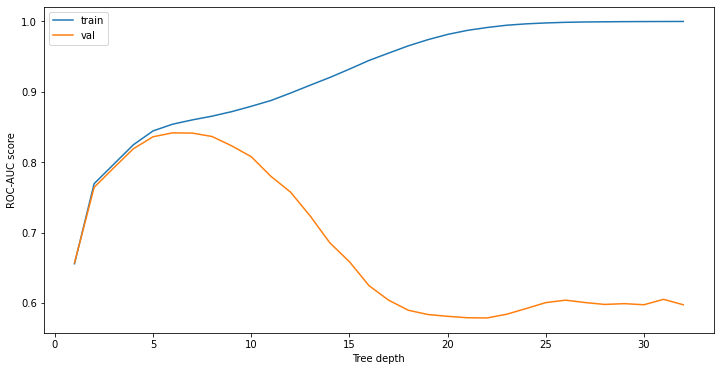

In [ ]:
# max_depths
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
val_results = []
for max_depth in max_depths:
   dt = tree.DecisionTreeClassifier(max_depth=max_depth)
   dt.fit(X_train_scaled, y_train)
   
   roc_auc_tr = roc_auc_score(y_train, dt.predict_proba(X_train_scaled)[:, 1])
   train_results.append(roc_auc_tr)
   
   roc_auc_v = roc_auc_score(y_val, dt.predict_proba(X_val_scaled)[:, 1])
   val_results.append(roc_auc_v)

%pylab inline
plt.figure(figsize(12,6))
plt.plot(max_depths,train_results,label="train")
plt.plot(max_depths,val_results,label="val")
plt.ylabel('ROC-AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show

Populating the interactive namespace from numpy and matplotlib


<function matplotlib.pyplot.show>

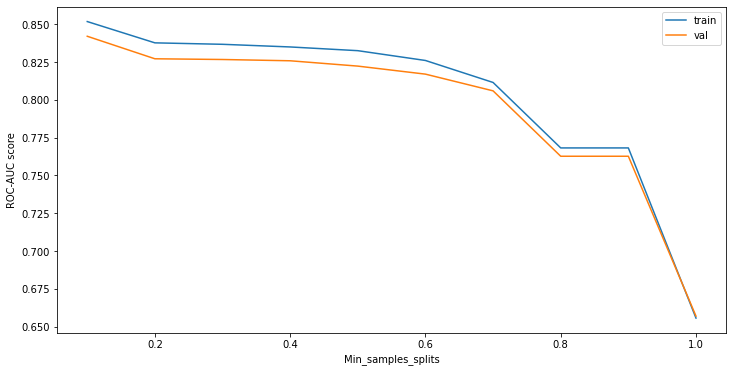

In [ ]:
# min_samples_splits
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
val_results = []
for min_samples_split in min_samples_splits:
   dt = tree.DecisionTreeClassifier(min_samples_split=min_samples_split)
   dt.fit(X_train_scaled, y_train)
   
   roc_auc_tr = roc_auc_score(y_train, dt.predict_proba(X_train_scaled)[:, 1])
   train_results.append(roc_auc_tr)
   
   roc_auc_v = roc_auc_score(y_val, dt.predict_proba(X_val_scaled)[:, 1])
   val_results.append(roc_auc_v)

%pylab inline
plt.figure(figsize(12,6))
plt.plot(min_samples_splits,train_results,label="train")
plt.plot(min_samples_splits,val_results,label="val")
plt.ylabel('ROC-AUC score')
plt.xlabel('Min_samples_splits')
plt.legend()
plt.show

Populating the interactive namespace from numpy and matplotlib


<function matplotlib.pyplot.show>

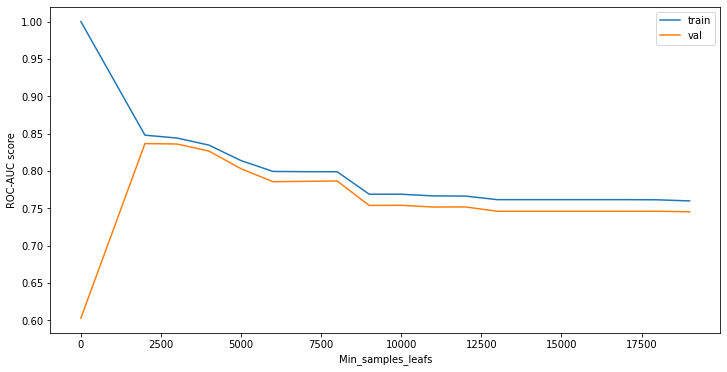

In [ ]:
# min_samples_leafs
min_samples_leafs  = np.arange(1000,20000,1000)
min_samples_leafs[0]=1
train_results = []
val_results = []
for min_samples_leaf in min_samples_leafs :
   dt = tree.DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
   dt.fit(X_train_scaled, y_train)
   
   roc_auc_tr = roc_auc_score(y_train, dt.predict_proba(X_train_scaled)[:, 1])
   train_results.append(roc_auc_tr)
   
   roc_auc_v = roc_auc_score(y_val, dt.predict_proba(X_val_scaled)[:, 1])
   val_results.append(roc_auc_v)

%pylab inline
plt.figure(figsize(12,6))
plt.plot(min_samples_leafs,train_results,label="train")
plt.plot(min_samples_leafs,val_results,label="val")
plt.ylabel('ROC-AUC score')
plt.xlabel('Min_samples_leafs')
plt.legend()
plt.show

Populating the interactive namespace from numpy and matplotlib


<function matplotlib.pyplot.show>

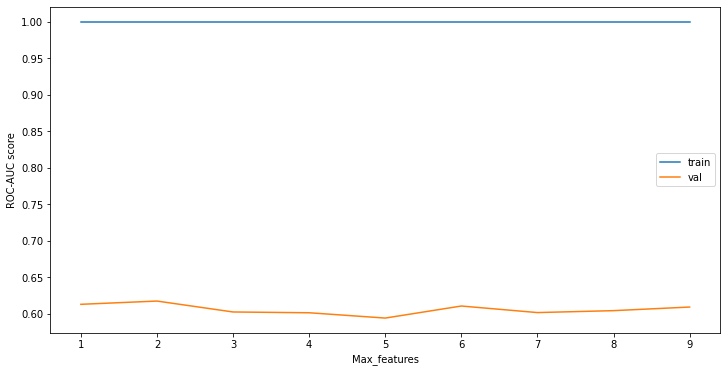

In [ ]:
# max_features
max_features  = list(range(1,X_train_scaled.shape[1]))
train_results = []
val_results = []
for max_feature in max_features :
   dt = tree.DecisionTreeClassifier(max_features=max_feature)
   dt.fit(X_train_scaled, y_train)
   
   roc_auc_tr = roc_auc_score(y_train, dt.predict_proba(X_train_scaled)[:, 1])
   train_results.append(roc_auc_tr)
   
   roc_auc_v = roc_auc_score(y_val, dt.predict_proba(X_val_scaled)[:, 1])
   val_results.append(roc_auc_v)

%pylab inline
plt.figure(figsize(12,6))
plt.plot(max_features,train_results,label="train")
plt.plot(max_features,val_results,label="val")
plt.ylabel('ROC-AUC score')
plt.xlabel('Max_features')
plt.legend()
plt.show

**GridSearchCV**

In [ ]:
dt = tree.DecisionTreeClassifier(random_state=0)
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
params = {
    'max_depth': [2, 3, 5, 7, 10,13,15],
    'min_samples_leaf': [5, 10, 20, 50, 100,200,300,350,365,385,400,450, 500,550, 600,650, 700,750, 800,850, 900 ,950,1000],
    'criterion': ["gini"]
}

In [ ]:
optimizer_dt = GridSearchCV(dt, param_grid=params,cv=5, scoring='roc_auc')
optimizer_dt.fit(X_train_scaled,y_train)
print(optimizer_dt.best_estimator_)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=365, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


In [ ]:
optimizer_dt.best_score_

0.854363882871042

In [ ]:
dt1 = tree.DecisionTreeClassifier(random_state=0, max_depth=10,min_samples_leaf=365)
dt1.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=365, random_state=0)

In [ ]:
# оценка модели
results = cross_validate(estimator=dt1, X=X_val_scaled, y=y_val, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])
results

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'fit_time': array([0.06587934, 0.06110907, 0.05755544, 0.06400347, 0.0603652 ]),
 'score_time': array([0.01053214, 0.00987506, 0.01102757, 0.01144791, 0.01142073]),
 'test_accuracy': array([0.92889417, 0.92865636, 0.9331589 , 0.9331589 , 0.9331589 ]),
 'test_f1': array([0.21932115, 0.22680412, 0.        , 0.        , 0.        ]),
 'test_precision': array([0.41176471, 0.41509434, 0.        , 0.        , 0.        ]),
 'test_recall': array([0.14946619, 0.15602837, 0.        , 0.        , 0.        ]),
 'test_roc_auc': array([0.8243658 , 0.82446176, 0.84017651, 0.83627535, 0.84905381])}

In [ ]:
# оценка модели средние значения
results1 = pd.DataFrame.from_dict(results)
results1.mean()

fit_time          0.061783
score_time        0.010861
test_accuracy     0.931405
test_precision    0.165372
test_recall       0.061099
test_f1           0.089225
test_roc_auc      0.834867
dtype: float64

In [ ]:
# roc_auc_score
auc_dt1 = roc_auc_score(y_val, dt1.predict_proba(X_val_scaled)[:, 1])
print(auc_dt1) 

0.8512131719918596


In [ ]:
# classification report
print(classification_report(y_val, dt1.predict(X_val_scaled)))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     19616
           1       0.60      0.14      0.23      1406

    accuracy                           0.94     21022
   macro avg       0.77      0.57      0.60     21022
weighted avg       0.92      0.94      0.92     21022



In [ ]:
# confusion matrix
cf_matrix=confusion_matrix(y_val, dt1.predict(X_val_scaled))
print(cf_matrix)

[[19484   132]
 [ 1208   198]]


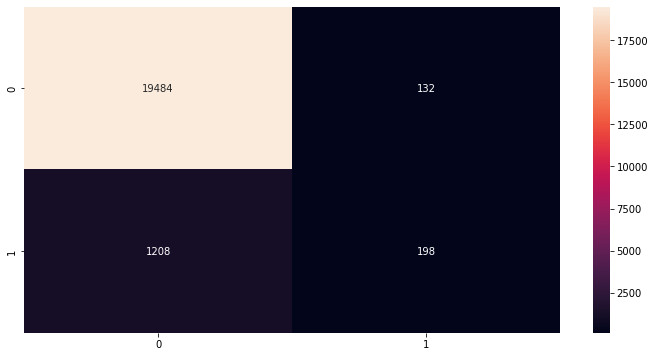

In [ ]:
sns.heatmap(cf_matrix, annot=True,fmt="d")	

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


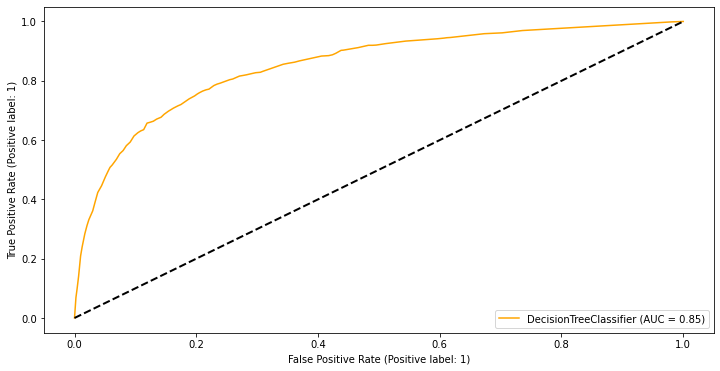

In [ ]:
# roc auc curve
metrics.plot_roc_curve(dt1, X_val_scaled, y_val, color = 'orange')
plt.plot([0, 1], [0, 1], color="black", lw=2, linestyle="--")

In [ ]:
# предсказание
y_pred_dt = dt1.predict_proba(test_data.to_numpy())[:, 1]
y_pred_dt

array([0.01673803, 0.05607477, 0.12068966, ..., 0.10509031, 0.10509031,
       0.00993677])

[Text(531.1765760869565, 311.3345454545455, 'X[6] <= 0.053\ngini = 0.125\nsamples = 84087\nvalue = [78462, 5625]'),
 Text(426.233152173913, 281.68363636363637, 'X[0] <= 0.917\ngini = 0.088\nsamples = 79424\nvalue = [75745, 3679]'),
 Text(329.5232608695652, 252.0327272727273, 'X[8] <= 0.06\ngini = 0.052\nsamples = 64503\nvalue = [62766, 1737]'),
 Text(263.1091304347826, 222.3818181818182, 'X[2] <= 0.016\ngini = 0.046\nsamples = 63020\nvalue = [61547, 1473]'),
 Text(183.4121739130435, 192.7309090909091, 'X[0] <= 0.045\ngini = 0.034\nsamples = 56497\nvalue = [55520, 977]'),
 Text(125.18608695652173, 163.08, 'X[3] <= 0.181\ngini = 0.025\nsamples = 47607\nvalue = [47011, 596]'),
 Text(84.42782608695651, 133.42909090909092, 'X[0] <= -0.521\ngini = 0.019\nsamples = 37965\nvalue = [37610, 355]'),
 Text(46.58086956521739, 103.77818181818182, 'X[1] <= -0.73\ngini = 0.015\nsamples = 29861\nvalue = [29639, 222]'),
 Text(23.290434782608695, 74.12727272727275, 'X[5] <= 0.108\ngini = 0.028\nsamples =

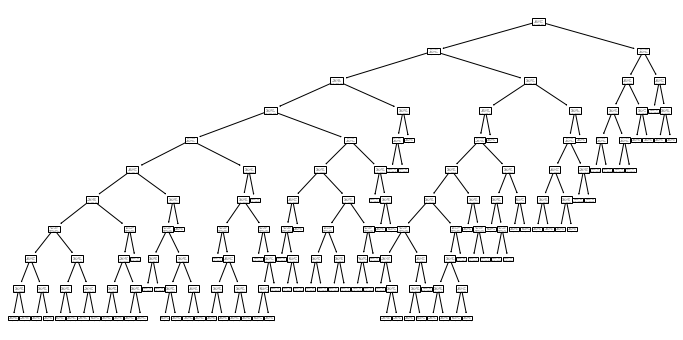

In [ ]:
tree.plot_tree(dt1)

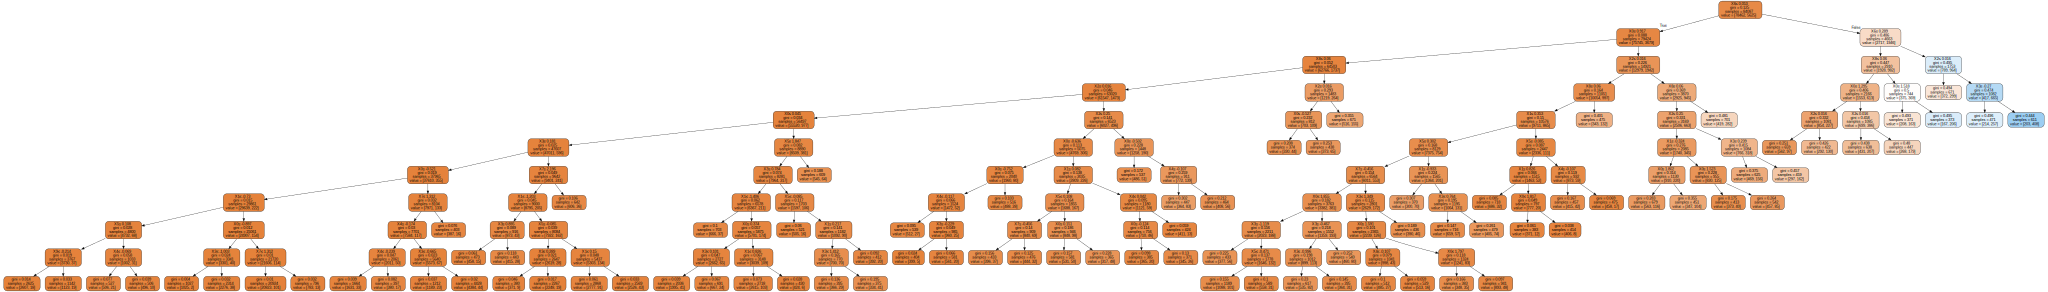

In [ ]:
dot_data = tree.export_graphviz(dt1, out_file=None, 
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

AUC = 0.85 - хороший результат. Метрики по предсказанию класса 0 - хорошие, по классу 1 - не очень.


*Kaggle public score  0.79390*  
*Kaggle private score 0.79686*


## **Random Forest**

Populating the interactive namespace from numpy and matplotlib


<function matplotlib.pyplot.show>

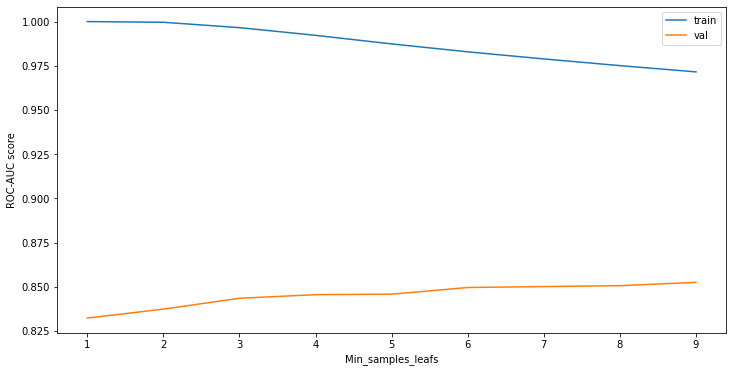

In [ ]:
# min_samples_leafs
min_samples_leafs  = np.arange(1,10)
#min_samples_leafs[0]=1
train_results = []
val_results = []
for min_samples_leaf in min_samples_leafs :
   rf = RandomForestClassifier(random_state=0, class_weight='balanced',min_samples_leaf=min_samples_leaf)
   rf.fit(X_train_scaled, y_train)
   
   roc_auc_tr = roc_auc_score(y_train, rf.predict_proba(X_train_scaled)[:, 1])
   train_results.append(roc_auc_tr)
   
   roc_auc_v = roc_auc_score(y_val, rf.predict_proba(X_val_scaled)[:, 1])
   val_results.append(roc_auc_v)

%pylab inline
plt.figure(figsize(12,6))
plt.plot(min_samples_leafs,train_results,label="train")
plt.plot(min_samples_leafs,val_results,label="val")
plt.ylabel('ROC-AUC score')
plt.xlabel('Min_samples_leafs')
plt.legend()
plt.show

In [ ]:
# max_depths
max_depths = np.linspace(1, 20, 20, endpoint=True)
train_results = []
val_results = []
for max_depth in max_depths:
   rf = RandomForestClassifier(random_state=0, class_weight='balanced', n_jobs=-1,max_depth=max_depth)
   rf.fit(X_train_scaled, y_train)
   
   #roc_auc_tr = roc_auc_score(y_train, dt.predict_proba(X_train_scaled)[:, 1])
   #train_results.append(roc_auc_tr)
   
   roc_auc_v = roc_auc_score(y_val, rf.predict_proba(X_val_scaled)[:, 1])
   val_results.append(roc_auc_v)

%pylab inline
plt.figure(figsize(12,6))
#plt.plot(max_depths,train_results,label="train")
plt.plot(max_depths,val_results,label="val")
plt.ylabel('ROC-AUC score')
plt.xlabel('RF depth')
plt.legend()
plt.show

<function matplotlib.pyplot.show>

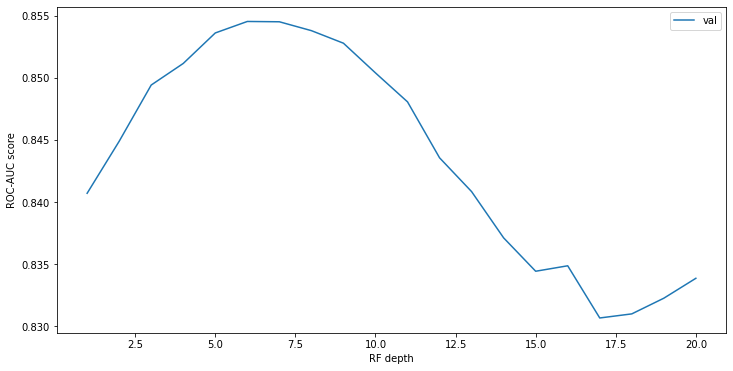

In [ ]:
plt.figure(figsize(12,6))
#plt.plot(max_depths,train_results,label="train")
plt.plot(max_depths,val_results,label="val")
plt.ylabel('ROC-AUC score')
plt.xlabel('RF depth')
plt.legend()
plt.show

In [ ]:
rf = RandomForestClassifier(random_state=0, class_weight='balanced', n_jobs=-1)

In [ ]:
params = {
    'n_estimators': [10, 30, 50, 80, 100, 150, 200],
    'max_depth': [3, 5, 7, 9,13,15],
    'min_samples_leaf': [1,3,5,7,11,21]
}

In [ ]:
optimizer_rf = GridSearchCV(rf, param_grid=params,cv=5, scoring='roc_auc')
optimizer_rf.fit(X_train_scaled,y_train)
print(optimizer_rf.best_estimator_)

RandomForestClassifier(class_weight='balanced', max_depth=15,
                       min_samples_leaf=21, n_estimators=200, n_jobs=-1,
                       random_state=0)


In [ ]:
auc_rf1 = roc_auc_score(y_train, optimizer_rf.predict_proba(X_train_scaled)[:, 1])
print(auc_rf1) 

0.9271845745569688


In [ ]:
auc_rf1 = roc_auc_score(y_val, optimizer_rf.predict_proba(X_val_scaled)[:, 1])
print(auc_rf1) 

0.8567111405268495


Зададим другие параметры, чтобы быстрее училась.

In [ ]:
params1 = {
    'n_estimators': [200,250, 300],
    'max_depth': [7,15,20],
    'min_samples_leaf': [21,25, 30]
}

In [ ]:
optimizer_rf1 = GridSearchCV(rf, param_grid=params1,cv=5, scoring='roc_auc')
optimizer_rf1.fit(X_train_scaled,y_train)
print(optimizer_rf1.best_estimator_)

RandomForestClassifier(class_weight='balanced', max_depth=15,
                       min_samples_leaf=30, n_estimators=250, n_jobs=-1,
                       random_state=0)


In [ ]:
rf = RandomForestClassifier(random_state=0, class_weight='balanced', n_estimators=250, max_depth=15, min_samples_leaf =30 )  #лучшая моделька
rf.fit(X_train_scaled,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15,
                       min_samples_leaf=30, n_estimators=250, random_state=0)

In [ ]:
# оценка модели
results = cross_validate(estimator=rf, X=X_val_scaled, y=y_val, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])
results

{'fit_time': array([4.81107926, 4.94768643, 4.85933161, 4.7869494 , 4.81366539]),
 'score_time': array([0.32843471, 0.34544611, 0.33171582, 0.32883239, 0.32805276]),
 'test_accuracy': array([0.84970273, 0.84209275, 0.85680304, 0.85537583, 0.85394862]),
 'test_f1': array([0.36546185, 0.36641221, 0.38696538, 0.38832998, 0.39328063]),
 'test_precision': array([0.25454545, 0.25065274, 0.27104137, 0.27068724, 0.27222982]),
 'test_recall': array([0.64768683, 0.68085106, 0.67615658, 0.68683274, 0.70818505]),
 'test_roc_auc': array([0.84554308, 0.83273042, 0.86436047, 0.85361083, 0.86741935])}

In [ ]:
# оценка модели средние значения
results1 = pd.DataFrame.from_dict(results)
results1.mean()	

fit_time          4.843742
score_time        0.332496
test_accuracy     0.851585
test_precision    0.263831
test_recall       0.679942
test_f1           0.380090
test_roc_auc      0.852733
dtype: float64

In [ ]:
# roc_auc_score
roc_auc_score(y_val, rf.predict_proba(X_val_scaled)[:, 1])  

0.856823558554691

In [ ]:
# classification report
print(classification_report(y_val, rf.predict(X_val_scaled)))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91     19616
           1       0.25      0.69      0.37      1406

    accuracy                           0.84     21022
   macro avg       0.61      0.77      0.64     21022
weighted avg       0.93      0.84      0.87     21022



In [ ]:
# confusion matrix
cf_matrix=confusion_matrix(y_val, rf.predict(X_val_scaled))
print(cf_matrix)

[[16764  2852]
 [  430   976]]


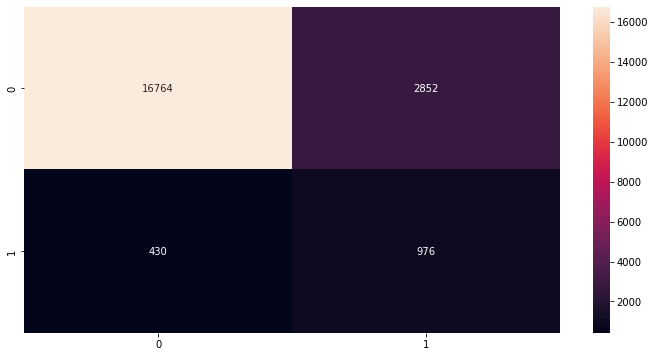

In [ ]:
sns.heatmap(cf_matrix, annot=True,fmt="d")	

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


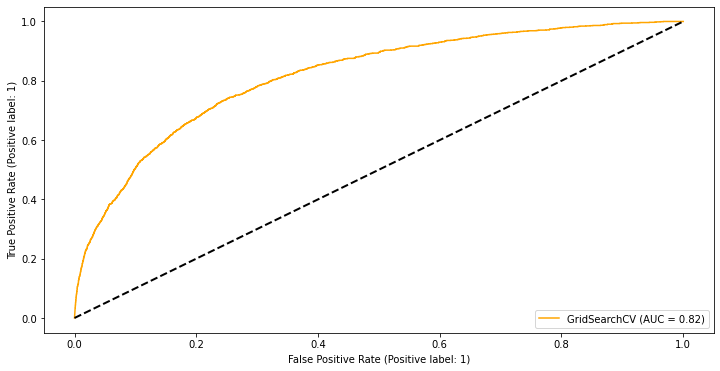

In [ ]:
# roc auc curve
metrics.plot_roc_curve(optimizer, X_val_scaled, y_val, color = 'orange')
plt.plot([0, 1], [0, 1], color="black", lw=2, linestyle="--")  

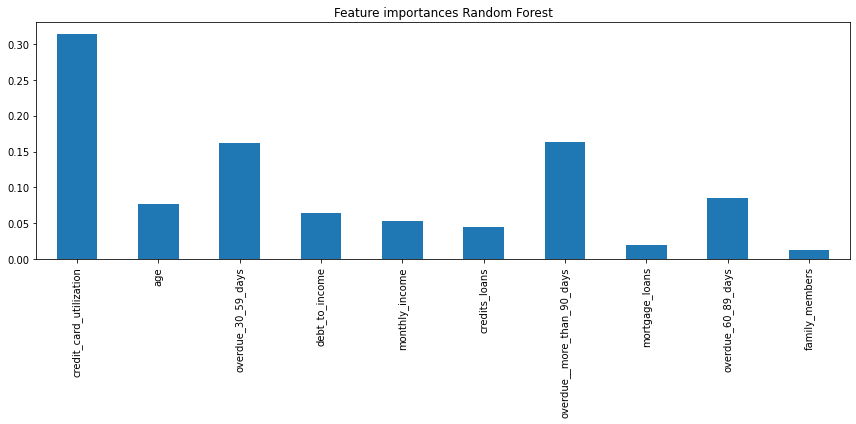

In [ ]:
importances = rf.feature_importances_
std = np.std([rf.feature_importances_ for tree in rf.estimators_], axis=0)
forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances Random Forest")
fig.tight_layout()

In [ ]:
# предсказание
y_pred_rf = rf.predict_proba(test_data.to_numpy())[:, 1]
y_pred_rf

array([0.22382655, 0.32817817, 0.57128599, ..., 0.35159547, 0.30418007,
       0.18033316])

Recall = 0.69 - неплохо обнаруживает класс в целом, precision  = 0.25 - плохо отличает класс от другого. AUC = 0.82 - вполне хороший результат. Больше всего влияют факторы (credit_card_utilization, overdue_30_59_days, overdue__more_than_90_days, overdue_60_89_days)

## **Gradient Boosting**


Используем RandomSearchCV для поиска лучших параметров. 

In [ ]:
# xgb = XGBClassifier(objective = 'binary:logistic',n_jobs=-1)
# params_gb = {
#               'n_estimators' : [100,150,200,250,300, 500, 700],
#               'max_depth' : [2,3,4,6,8,10,15],
#               'learning_rate' : [0.05,0.1,0.125,0.15],
#               'gamma':[0.1,0.2,0.3],
#               'colsample_bytree' : [0.2,0.5,0.7,1],  
#               'min_child_weight': [3,5,7,9], 
#               'subsample': [0.5,0.7,1],
              
#               'eval_matric': 'auc',
# }
# optimizer_xgb = RandomizedSearchCV(xgb, param_distributions = params_gb, cv = 5, random_state=0)

In [ ]:
# optimizer_xgb.fit(X_train_scaled,y_train)

RandomizedSearchCV(cv=5, estimator=XGBClassifier(n_jobs=-1),
                   param_distributions={'colsample_bytree': [0.2, 0.5, 0.7, 1],
                                        'eval_matric': 'auc',
                                        'gamma': [0.1, 0.2, 0.3],
                                        'learning_rate': [0.05, 0.1, 0.125,
                                                          0.15],
                                        'max_depth': [2, 3, 4, 6, 8, 10, 15],
                                        'min_child_weight': [3, 5, 7, 9],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300, 500, 700],
                                        'subsample': [0.5, 0.7, 1]},
                   random_state=0)

In [ ]:
# optimizer_xgb.best_estimator_

XGBClassifier(colsample_bytree=0.7, eval_matric='a', gamma=0.2,
              learning_rate=0.125, max_depth=2, min_child_weight=5,
              n_estimators=200, n_jobs=-1, subsample=0.5)

In [ ]:
# лучшая модель
xgb = XGBClassifier(objective = 'binary:logistic',colsample_bytree=0.7, eval_matric='a',
                    gamma=0.2, learning_rate=0.125, max_depth=2, min_child_weight=5,
                    n_estimators=200, n_jobs=-1, subsample=0.5)

In [ ]:
xgb.fit(X_train_scaled, y_train)

XGBClassifier(colsample_bytree=0.7, eval_matric='a', gamma=0.2,
              learning_rate=0.125, max_depth=2, min_child_weight=5,
              n_estimators=200, n_jobs=-1, subsample=0.5)

In [ ]:
# оценка модели
results = cross_validate(estimator=xgb, X=X_val_scaled, y=y_val, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])
results

{'fit_time': array([1.19010854, 1.15590143, 1.15678477, 1.15091515, 1.15694189]),
 'score_time': array([0.04044938, 0.0441072 , 0.04454565, 0.05193663, 0.03900647]),
 'test_accuracy': array([0.9372176 , 0.93483948, 0.93791627, 0.94077069, 0.93862988]),
 'test_f1': array([0.3015873 , 0.30102041, 0.31496063, 0.35324675, 0.31746032]),
 'test_precision': array([0.58762887, 0.53636364, 0.6       , 0.65384615, 0.6185567 ]),
 'test_recall': array([0.20284698, 0.20921986, 0.21352313, 0.24199288, 0.21352313]),
 'test_roc_auc': array([0.84265094, 0.84027458, 0.85740632, 0.85323437, 0.8640593 ])}

In [ ]:
# оценка модели средние значения
results1 = pd.DataFrame.from_dict(results)
results1.mean()

fit_time          1.162130
score_time        0.044009
test_accuracy     0.937875
test_precision    0.599279
test_recall       0.216221
test_f1           0.317655
test_roc_auc      0.851525
dtype: float64

In [ ]:
# roc_auc_score
auc_xgb = roc_auc_score(y_val, xgb.predict_proba(X_val_scaled)[:, 1])
print(auc_xgb)

0.8585697816280263


In [ ]:
# classification report
print(classification_report(y_val, xgb.predict(X_val_scaled)))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     19616
           1       0.61      0.19      0.29      1406

    accuracy                           0.94     21022
   macro avg       0.78      0.59      0.63     21022
weighted avg       0.92      0.94      0.92     21022



In [ ]:
# confusion matrix
cf_matrix=confusion_matrix(y_val, xgb.predict(X_val_scaled))
print(cf_matrix)

[[19444   172]
 [ 1141   265]]


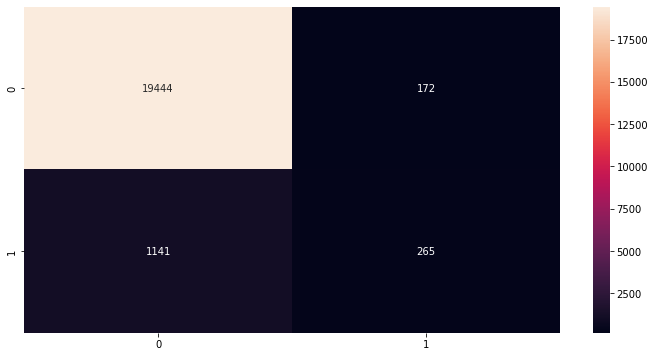

In [ ]:
sns.heatmap(cf_matrix, annot=True,fmt="d")	

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


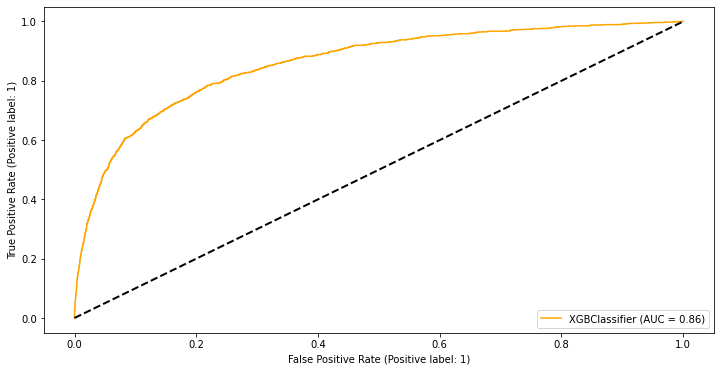

In [ ]:
# roc auc curve
metrics.plot_roc_curve(xgb, X_val_scaled, y_val, color = 'orange')
plt.plot([0, 1], [0, 1], color="black", lw=2, linestyle="--")

In [ ]:
y_pred_xgb = xgb.predict_proba(test_data.to_numpy())[:, 1]
y_pred_xgb

array([0.01930782, 0.03279118, 0.18070415, ..., 0.0275099 , 0.03564266,
       0.01813714], dtype=float32)

In [ ]:
importances = xgb.feature_importances_
importances
pd.DataFrame(importances,index=X.columns,columns=['features'])

,features
credit_card_utilization,0.139863
age,0.037095
overdue_30_59_days,0.164281
debt_to_income,0.025299
monthly_income,0.018445
credits_loans,0.021860
overdue__more_than_90_days,0.378801
mortgage_loans,0.036417
overdue_60_89_days,0.163916
family_members,0.014025


Самое большое значение AUC, наиболее важные факторы overdues + credit_card_utilization. Recall для класса 1 - 0,19 - не самое лучшее значение.

*Kaggle public score  0.83102*  
*Kaggle private score 0.83677*

## **LGBM**

In [ ]:
space = {
    'n_estimators': hp.quniform('n_estimators', 10, 1000, 10),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(1)),
    'max_depth':hp.quniform('max_depth', 2,10,1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.4, 1.0),
    'subsample':hp.uniform('subsample', 0.5, 0.9),
    'reg_lambda': hp.uniform('reg_lambda', 1, 20),
}

In [ ]:
def objective_function(params):
    params = {'n_estimators': int(params['n_estimators']),
             'learning_rate': params['learning_rate'],
             'max_depth': int(params['max_depth']),
             'colsample_bytree': params['colsample_bytree'],
             'subsample': params['subsample'],
             'reg_lambda': params['reg_lambda'],
             }
    lgbm= LGBMClassifier(**params)
    score = cross_val_score(lgbm, X_train_scaled, y_train, scoring='roc_auc', cv=5, n_jobs=-1).mean()
    return -score

In [ ]:
best_params = fmin(fn = objective_function, space = space, max_evals=20, rstate=np.random.RandomState(0), algo=tpe.suggest)

100%|██████████| 20/20 [04:47<00:00, 14.38s/it, best loss: -0.864562366687475]


In [ ]:
best_params

{'colsample_bytree': 0.5920197755318052,
 'learning_rate': 0.028104150458521673,
 'max_depth': 9.0,
 'n_estimators': 190.0,
 'reg_lambda': 3.4695252251965094,
 'subsample': 0.6219399780024325}

In [ ]:
lgbm = LGBMClassifier(random_state=0,
                        n_estimators=int(best_params['n_estimators']), 
                        learning_rate= best_params['learning_rate'],
                        max_depth= int(best_params['max_depth']),
                        colsample_bytree = best_params['colsample_bytree'],
                        subsample= best_params['subsample'],
                        reg_lambda= best_params['reg_lambda']
                       )

lgbm.fit(X_train_scaled, y_train)

LGBMClassifier(colsample_bytree=0.5920197755318052,
               learning_rate=0.028104150458521673, max_depth=9,
               n_estimators=190, random_state=0, reg_lambda=3.4695252251965094,
               subsample=0.6219399780024325)

In [ ]:
# оценка модели
results = cross_validate(estimator=lgbm, X=X_val_scaled, y=y_val, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])
results

{'fit_time': array([0.41578841, 0.37487483, 0.37140751, 0.35056305, 0.34737325]),
 'score_time': array([0.08361244, 0.09302521, 0.08128858, 0.08721471, 0.09289432]),
 'test_accuracy': array([0.93697979, 0.93412604, 0.94029496, 0.94100856, 0.93981922]),
 'test_f1': array([0.27792916, 0.26133333, 0.31607629, 0.30337079, 0.3180593 ]),
 'test_precision': array([0.59302326, 0.52688172, 0.6744186 , 0.72      , 0.65555556]),
 'test_recall': array([0.18149466, 0.17375887, 0.20640569, 0.19217082, 0.20996441]),
 'test_roc_auc': array([0.84679552, 0.84267179, 0.86477866, 0.85253542, 0.86902046])}

In [ ]:
# оценка модели средние значения
results1 = pd.DataFrame.from_dict(results)
results1.mean()	

fit_time          0.372001
score_time        0.087607
test_accuracy     0.938446
test_precision    0.633976
test_recall       0.192759
test_f1           0.295354
test_roc_auc      0.855160
dtype: float64

In [ ]:
# roc_auc_score
auc_lgbm = roc_auc_score(y_val, lgbm.predict_proba(X_val_scaled)[:, 1])
print(auc_lgbm)

0.859388832439162


In [ ]:
# classification report
print(classification_report(y_val, lgbm.predict(X_val_scaled)))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     19616
           1       0.63      0.17      0.27      1406

    accuracy                           0.94     21022
   macro avg       0.79      0.58      0.62     21022
weighted avg       0.92      0.94      0.92     21022



In [ ]:
# confusion matrix
cf_matrix=confusion_matrix(y_val, lgbm.predict(X_val_scaled))
print(cf_matrix)

[[19473   143]
 [ 1165   241]]


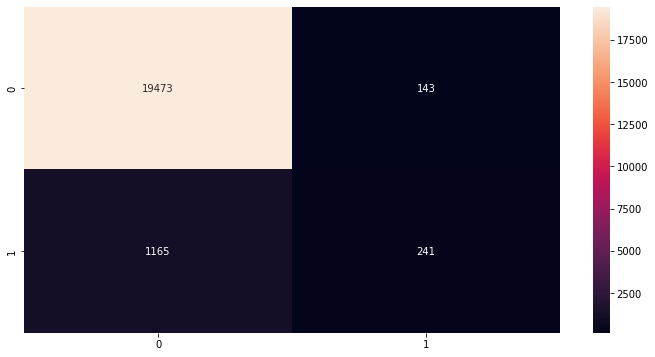

In [ ]:
sns.heatmap(cf_matrix, annot=True,fmt="d")	

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


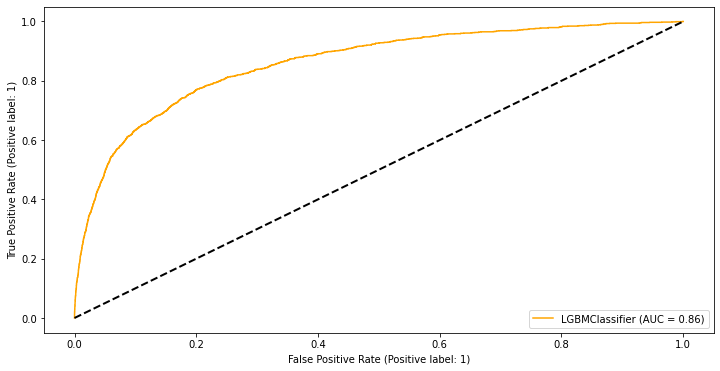

In [ ]:
# roc auc curve
metrics.plot_roc_curve(lgbm, X_val_scaled, y_val, color = 'orange')
plt.plot([0, 1], [0, 1], color="black", lw=2, linestyle="--") 

In [ ]:
y_pred_lgbm = lgbm.predict_proba(test_data)[:, 1]
y_pred_lgbm

array([0.035019  , 0.05473017, 0.18798957, ..., 0.05302445, 0.06494168,
       0.02418618])

AUC = 0.86 - хороший результат. Recall - низкий, precision - не плохой.


*Kaggle public score  0.82128*  
*Kaggle private score 0.82881*

## **Voting**  
(результат на Kaggle хуже чем у моделей по отдельности)

RF + LGBM + XGB

In [ ]:
clf1 = RandomForestClassifier(random_state=0)
clf2 = LGBMClassifier(random_state=0)
clf3 = XGBClassifier(random_state=0)
eclf = VotingClassifier(estimators=[ ('rf', clf1), ('lgbm', clf2),('xgb', clf3)], voting='soft', ) 

In [ ]:
eclf.fit(X_train_scaled,y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=0)),
                             ('lgbm', LGBMClassifier(random_state=0)),
                             ('xgb', XGBClassifier())],
                 voting='soft')

In [ ]:
p_v = roc_auc_score(y_val, eclf.predict_proba(X_val_scaled)[:, 1])
print(p_v) 
p_t = roc_auc_score(y_train, eclf.predict_proba(X_train_scaled)[:, 1])
print(p_t) 

0.8559033840926442
0.9889581039937237


C настроенным RF

In [ ]:
eclf = VotingClassifier(estimators=[ ('rf', clf1), ('lgbm', clf2),('xgb', clf3)], voting='soft', ) 

params = {         
            'rf__n_estimators': [200,250, 300], 'rf__max_depth': [7,15,20], 'rf__min_samples_leaf': [21,25, 30]
          
            # 'lgbm__n_estimators' : np.arange(10, 1000, 10), 'lgbm__max_depth' : np.arange(2, 10), 'lgbm__learning_rate' : [np.log(0.01), np.log(1)],
            # 'lgbm__colsample_bytree' : [0.4, 1],  'lgbm__subsample': [0.5, 0.9],
             
            # 'xgb__n_estimators' : [100,150,200,250,300, 500, 700], 'xgb__max_depth' : [2,3,4,6,8,10,15], 'xgb__learning_rate' : [0.05,0.1,0.125,0.15],
            # 'xgb__gamma':[0.1,0.2,0.3], 'xgb__colsample_bytree' : [0.2,0.5,0.7,1], 'xgb__min_child_weight': [3,5,7,9], 'xgb__subsample': [0.5,0.7,1],
                  
         } 
optimizer_eclf = RandomizedSearchCV(estimator=eclf, param_distributions=params, cv=5, scoring='roc_auc', n_jobs=-1)

In [ ]:
optimizer_eclf.fit(X_train_scaled,y_train)

RandomizedSearchCV(cv=5,
                   estimator=VotingClassifier(estimators=[('rf',
                                                           RandomForestClassifier(random_state=0)),
                                                          ('lgbm',
                                                           LGBMClassifier(random_state=0)),
                                                          ('xgb',
                                                           XGBClassifier())],
                                              voting='soft'),
                   n_jobs=-1,
                   param_distributions={'rf__max_depth': [7, 15, 20],
                                        'rf__min_samples_leaf': [21, 25, 30],
                                        'rf__n_estimators': [200, 250, 300]},
                   scoring='roc_auc')

In [ ]:
p = roc_auc_score(y_val, optimizer_eclf.predict_proba(X_val_scaled)[:, 1])
print(p) 
p1 = roc_auc_score(y_train, optimizer_eclf.predict_proba(X_train_scaled)[:, 1])
print(p1) 

0.8590029019478395
0.9121891905211015


In [ ]:
optimizer_eclf.best_params_

{'rf__max_depth': 20, 'rf__min_samples_leaf': 21, 'rf__n_estimators': 300}

In [ ]:
y_pred_eclf1 = optimizer_eclf.predict_proba(test_data.to_numpy())[:, 1] # c настроенным rf
y_pred_eclf1

array([0.06040901, 0.06437867, 0.1570795 , ..., 0.06265419, 0.08206153,
       0.03504245])

In [ ]:
# eclf = VotingClassifier(estimators=[ ('rf', clf1), ('lgbm', clf2),('xgb', clf3)], voting='soft', ) 

# params = {         
#             #'rf__n_estimators': [200,250, 300], 'rf__max_depth': [7,15,20], 'rf__min_samples_leaf': [21,25, 30]
          
#              'lgbm__n_estimators' : np.arange(10, 1000, 10), 'lgbm__max_depth' : np.arange(2, 10), 'lgbm__colsample_bytree' : [0.4, 1],  'lgbm__subsample': [0.5, 0.9],
             
#             # 'xgb__n_estimators' : [100,150,200,250,300, 500, 700], 'xgb__max_depth' : [2,3,4,6,8,10,15], 'xgb__learning_rate' : [0.05,0.1,0.125,0.15],
#             # 'xgb__gamma':[0.1,0.2,0.3], 'xgb__colsample_bytree' : [0.2,0.5,0.7,1], 'xgb__min_child_weight': [3,5,7,9], 'xgb__subsample': [0.5,0.7,1],
                  
#          } 
# optimizer_eclf2 = RandomizedSearchCV(estimator=eclf, param_distributions=params, cv=5, scoring='roc_auc', n_jobs=-1)

In [ ]:
# optimizer_eclf2.fit(X_train_scaled,y_train)

In [ ]:
# p = roc_auc_score(y_val, optimizer_eclf2.predict_proba(X_val_scaled)[:, 1])
# print(p) 
# p1 = roc_auc_score(y_train, optimizer_eclf2.predict_proba(X_train_scaled)[:, 1])
# print(p1) 

0.8573681360645011
0.9876058377870107


In [ ]:
# optimizer_eclf2.best_params_

{'lgbm__colsample_bytree': 0.4,
 'lgbm__max_depth': 4,
 'lgbm__n_estimators': 90,
 'lgbm__subsample': 0.5}

С настроенным XGB

In [ ]:
eclf = VotingClassifier(estimators=[ ('rf', clf1), ('lgbm', clf2),('xgb', clf3)], voting='soft', ) 

params = {         
            #'rf__n_estimators': [200,250, 300], 'rf__max_depth': [7,15,20], 'rf__min_samples_leaf': [21,25, 30],
          
            # 'lgbm__n_estimators' : np.arange(10, 1000, 10), 'lgbm__max_depth' : np.arange(2, 10), 'lgbm__colsample_bytree' : [0.4, 1],  'lgbm__subsample': [0.5, 0.9],
             
            'xgb__n_estimators' : [100,150,200,250,300, 500, 700], 'xgb__max_depth' : [2,3,4,6,8,10,15], 'xgb__learning_rate' : [0.05,0.1,0.125,0.15],
             'xgb__gamma':[0.1,0.2,0.3], 'xgb__colsample_bytree' : [0.2,0.5,0.7,1], 'xgb__min_child_weight': [3,5,7,9], 'xgb__subsample': [0.5,0.7,1],
                  
         } 
optimizer_eclf3 = RandomizedSearchCV(estimator=eclf, param_distributions=params, cv=5, scoring='roc_auc', n_jobs=-1)

In [ ]:
optimizer_eclf3.fit(X_train_scaled,y_train)

RandomizedSearchCV(cv=5,
                   estimator=VotingClassifier(estimators=[('rf',
                                                           RandomForestClassifier(random_state=0)),
                                                          ('lgbm',
                                                           LGBMClassifier(random_state=0)),
                                                          ('xgb',
                                                           XGBClassifier())],
                                              voting='soft'),
                   n_jobs=-1,
                   param_distributions={'xgb__colsample_bytree': [0.2, 0.5, 0.7,
                                                                  1],
                                        'xgb__gamma': [0.1, 0.2, 0.3],
                                        'xgb__learning_rate': [0.05, 0.1, 0.125,
                                                               0.15],
                                        'x

In [ ]:
optimizer_eclf3.best_params_

{'xgb__colsample_bytree': 1,
 'xgb__gamma': 0.1,
 'xgb__learning_rate': 0.05,
 'xgb__max_depth': 4,
 'xgb__min_child_weight': 9,
 'xgb__n_estimators': 150,
 'xgb__subsample': 0.7}

In [ ]:
p = roc_auc_score(y_val, optimizer_eclf3.predict_proba(X_val_scaled)[:, 1])
print(p) 
p1 = roc_auc_score(y_train, optimizer_eclf3.predict_proba(X_train_scaled)[:, 1])
print(p1) 

0.8558261726137574
0.9890723265898


In [ ]:
y_pred_eclf2 = optimizer_eclf3.predict_proba(test_data.to_numpy())[:, 1]
y_pred_eclf2

array([0.15490091, 0.12321886, 0.21174388, ..., 0.14538066, 0.13227733,
       0.08434087])

In [ ]:
# eclf = VotingClassifier(estimators=[ ('rf', clf1), ('lgbm', clf2),('xgb', clf3)], voting='soft', ) 

# params = {         
#             'rf__n_estimators': [200,250, 300], 'rf__max_depth': [7,15,20], 'rf__min_samples_leaf': [21,25, 30],
          
#              'lgbm__n_estimators' : np.arange(10, 1000, 10), 'lgbm__max_depth' : np.arange(2, 10), 'lgbm__colsample_bytree' : [0.4, 1],  'lgbm__subsample': [0.5, 0.9],
             
#              'xgb__n_estimators' : [100,150,200,250,300, 500, 700], 'xgb__max_depth' : [2,3,4,6,8,10,15], 'xgb__learning_rate' : [0.05,0.1,0.125,0.15],
#             'xgb__gamma':[0.1,0.2,0.3], 'xgb__colsample_bytree' : [0.2,0.5,0.7,1], 'xgb__min_child_weight': [3,5,7,9], 'xgb__subsample': [0.5,0.7,1],
                  
#          } 
# optimizer_eclf4 = RandomizedSearchCV(estimator=eclf, param_distributions=params, cv=5, scoring='roc_auc', n_jobs=-1)

In [ ]:
# optimizer_eclf4.fit(X_train_scaled,y_train)

In [ ]:
# optimizer_eclf4.best_params_

NameError: ignored

In [ ]:
# p = roc_auc_score(y_val, optimizer_eclf4.predict_proba(X_val_scaled)[:, 1])
# print(p) 
# p1 = roc_auc_score(y_train, optimizer_eclf4.predict_proba(X_train_scaled)[:, 1])
# print(p1) 

0.8585921165756639
0.9073108998269509


In [ ]:
y_pred_eclf1 = optimizer_eclf4.predict_proba(test_data.to_numpy())[:, 1]
y_pred_eclf1

array([0.03655396, 0.04332681, 0.14869096, ..., 0.05047633, 0.05843961,
       0.02526529])

Voting 2.0

In [ ]:
clf1 = LGBMClassifier(random_state=0)
clf2 = XGBClassifier(random_state=0)
eclf = VotingClassifier(estimators=[('lgbm', clf1),('xgb', clf2)], voting='soft')

In [ ]:
eclf.fit(X_train_scaled,y_train)

VotingClassifier(estimators=[('lgbm', LGBMClassifier(random_state=0)),
                             ('xgb', XGBClassifier())],
                 voting='soft')

In [ ]:
p = roc_auc_score(y_val, eclf.predict_proba(X_val_scaled)[:, 1])
print(p) 
p1 = roc_auc_score(y_train, eclf.predict_proba(X_train_scaled)[:, 1])
print(p1) 

0.858287059624448
0.8935066588497192


In [ ]:
y_pred_eclf = eclf.predict_proba(test_data.to_numpy())[:, 1]
y_pred_eclf

array([0.06575182, 0.0632088 , 0.13536816, ..., 0.05840819, 0.07973659,
       0.03497696])

## Эксперимент с CV

Populating the interactive namespace from numpy and matplotlib


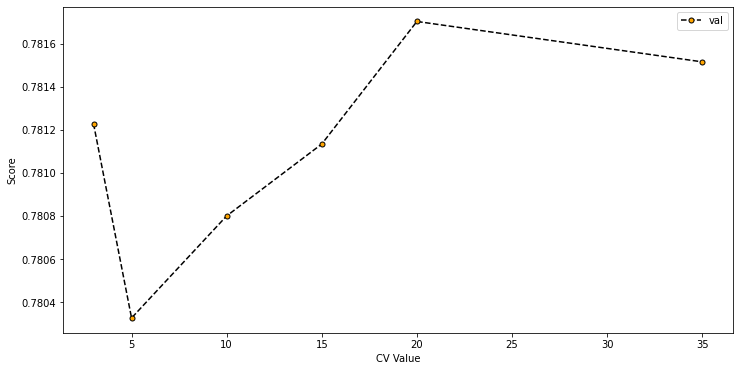

In [ ]:
cvs = [3,5,10,15,20,35]
scores =[]
for cv in cvs:
    score = cross_val_score(lr1, X_val_scaled, y_val, cv=cv) 
    scores.append(np.mean(score))
    
%pylab inline
plt.figure(figsize(12,6))
plt.plot(cvs,scores,label="val", color = 'black',linestyle='dashed', 
         marker='o',markerfacecolor='orange', markersize=5)
plt.xlabel('CV Value')
plt.ylabel('Score')
plt.legend()
plt.show()

Populating the interactive namespace from numpy and matplotlib


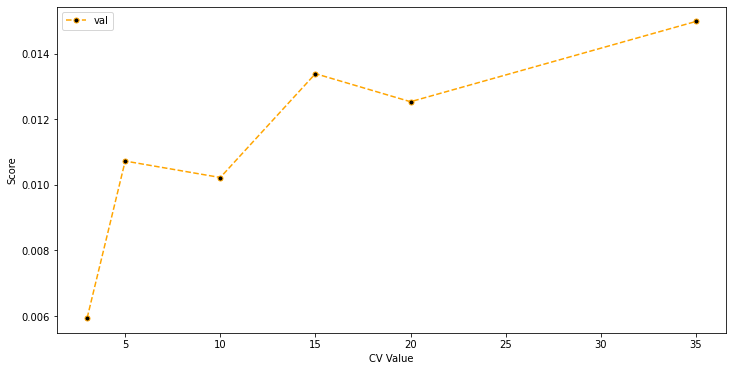

In [ ]:
stds =[]
for cv in cvs:
    score = cross_val_score(lr1, X_val_scaled, y_val, cv=cv) 
    stds.append(np.std(score))
    
%pylab inline
plt.figure(figsize(12,6))
plt.plot(cvs,stds,label="val", color = 'orange',linestyle='dashed', 
         marker='o',markerfacecolor='black', markersize=5)
plt.xlabel('CV Value')
plt.ylabel('Score')
plt.legend()
plt.show()

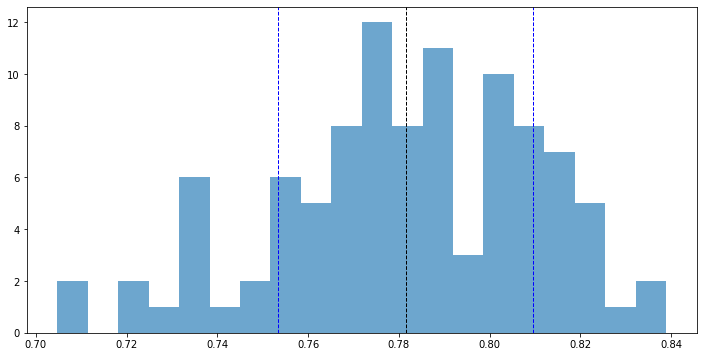

In [ ]:
cv_1 = cross_val_score(lr1, X_val_scaled, y_val, cv=100)
plt.hist(cv_1, bins=20, alpha=0.65)
plt.axvline(cv_1.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(cv_1.mean()+cv_1.std(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(cv_1.mean()-cv_1.std(), color='b', linestyle='dashed', linewidth=1)